#MIT 6.036 Spring 2019: Homework 8#

This colab notebook provides code and a framework for [homework 8](https://openlearninglibrary.mit.edu/courses/course-v1:MITx+6.036+1T2019/courseware/Week8/week8_homework/).  You can work out your solutions here, then submit your results back on the homework page when ready. By New MIT course 2024

## <section>**Setup**</section>

First, download the code distribution for this homework that contains test cases and helper functions.

Run the next code block to download and import the code for this lab.


In [ ]:
!pip install tensorflow==2.8.0
!pip install np_utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 34.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: goo

In [ ]:
import tensorflow as tf

session = tf.compat.v1.keras.backend.get_session()
from tensorflow.compat.v1.keras.models import Sequential

In [ ]:
!rm -rf code_for_hw8*
!rm -rf data
!rm -rf mnist_data
!rm -rf *.zip
!rm -rf test*/
!rm -rf *.py
!rm -rf *.pt
!rm -rf __*

!wget https://introml_oll.odl.mit.edu/cat-soop/_static/6.036/homework/hw08/code_for_hw8.zip --no-check-certificate

!unzip code_for_hw8.zip
!mv code_for_hw8/* .

from code_for_hw8 import *

import numpy as np
import itertools

import math as m

import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from matplotlib import pyplot as plt

from torchvision.datasets import MNIST
import torchvision

from skimage.io import imread, imshow
from skimage.transform import resize

import os
!pwd

os.environ['KERAS_BACKEND']='tensorflow'



--2024-09-12 14:15:31--  https://introml_oll.odl.mit.edu/cat-soop/_static/6.036/homework/hw08/code_for_hw8.zip
Resolving introml_oll.odl.mit.edu (introml_oll.odl.mit.edu)... 3.226.240.108
Connecting to introml_oll.odl.mit.edu (introml_oll.odl.mit.edu)|3.226.240.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95906 (94K) [application/zip]
Saving to: ‘code_for_hw8.zip’

code_for_hw8.zip    100%[===================>]  93.66K  --.-KB/s    in 0.04s   

2024-09-12 14:15:31 (2.24 MB/s) - ‘code_for_hw8.zip’ saved [95906/95906]

Archive:  code_for_hw8.zip
   creating: code_for_hw8/
  inflating: code_for_hw8/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/code_for_hw8/
  inflating: __MACOSX/code_for_hw8/._.DS_Store  
  inflating: code_for_hw8/code_for_hw8_oop.py  
  inflating: __MACOSX/code_for_hw8/._code_for_hw8_oop.py  
   creating: code_for_hw8/data/
  inflating: code_for_hw8/data/data3_train.csv  
   creating: __MACOSX/code_for_hw8/data/
  inflating: __

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

# Define the path to your ZIP file and extraction folder
zip_file_path = '/content/drive/My Drive/Colab Notebooks/code_for_hw8.zip'
extract_folder = '/content/drive/My Drive/Colab Notebooks/code_for_hw8/'

# Create the extraction folder if it doesn't exist
os.makedirs(extract_folder, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Extraction completed.")


Extraction completed.


In [ ]:
#   Data Sets
######################################################################

def super_simple_separable_through_origin():
    X = np.array([[2, 3, 9, 12],
                  [5, 1, 6, 5]])
    y = np.array([[1, 0, 1, 0]])
    return X, for_softmax(y)


def super_simple_separable():
    X = np.array([[2, 3, 9, 12],
                  [5, 2, 6, 5]])
    y = np.array([[1, 0, 1, 0]])
    return X, for_softmax(y)


def xor():
    X = np.array([[1, 2, 1, 2],
                  [1, 2, 2, 1]])
    y = np.array([[1, 1, 0, 0]])
    return X, for_softmax(y)


def xor_more():
    X = np.array([[1, 2, 1, 2, 2, 4, 1, 3],
                  [1, 2, 2, 1, 3, 1, 3, 3]])
    y = np.array([[1, 1, 0, 0, 1, 1, 0, 0]])
    return X, for_softmax(y)


def hard():
    X = np.array([[-0.23390341, 1.18151883, -2.46493986, 1.55322202, 1.27621763,
                   2.39710997, -1.3440304, -0.46903436, -0.64673502, -1.44029872,
                   -1.37537243, 1.05994811, -0.93311512, 1.02735575, -0.84138778,
                   -2.22585412, -0.42591102, 1.03561105, 0.91125595, -2.26550369],
                  [-0.92254932, -1.1030963, -2.41956036, -1.15509002, -1.04805327,
                   0.08717325, 0.8184725, -0.75171045, 0.60664705, 0.80410947,
                   -0.11600488, 1.03747218, -0.67210575, 0.99944446, -0.65559838,
                   -0.40744784, -0.58367642, 1.0597278, -0.95991874, -1.41720255]])
    y = np.array([[1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
                   1., 0., 0., 0., 1., 1., 0.]])
    return X, for_softmax(y)


def for_softmax(y):
    return np.vstack([1 - y, y])


In [ ]:
######################################################################
# Tests
######################################################################

def unit_test(name, expected, actual):
    if actual is None:
        print(name + ": unimplemented")
    elif np.allclose(expected, actual):
        print(name + ": OK")
    else:
        print(name + ": FAILED")
        print("expected: " + str(expected))
        print("but was: " + str(actual))


def sgd_test(nn, test_values):
    """Run one step of SGD on a simple dataset with the specified
    network, and with batch size (b) = len(dataset)

    :param nn: A "Sequential" object representing a neural network

    :param test_values: A dictionary containing the expected values
    for the necessary unit tests

    """
    lrate = 0.005
    # data
    X, Y = super_simple_separable()

    # define the modules
    assert len(nn.modules) == 4
    (linear_1, f_1, linear_2, f_2) = nn.modules
    Loss = nn.loss

    unit_test('linear_1.W', test_values['linear_1.W'], linear_1.W)
    unit_test('linear_1.W0', test_values['linear_1.W0'], linear_1.W0)
    unit_test('linear_2.W', test_values['linear_2.W'], linear_2.W)
    unit_test('linear_2.W0', test_values['linear_2.W0'], linear_2.W0)

    z_1 = linear_1.forward(X)
    unit_test('z_1', test_values['z_1'], z_1)
    a_1 = f_1.forward(z_1)
    unit_test('a_1', test_values['a_1'], a_1)
    z_2 = linear_2.forward(a_1)
    unit_test('z_2', test_values['z_2'], z_2)
    a_2 = f_2.forward(z_2)
    unit_test('a_2', test_values['a_2'], a_2)

    Ypred = a_2
    loss = Loss.forward(Ypred, Y)
    unit_test('loss', test_values['loss'], loss)
    dloss = Loss.backward()
    unit_test('dloss', test_values['dloss'], dloss)

    dL_dz2 = f_2.backward(dloss)
    unit_test('dL_dz2', test_values['dL_dz2'], dL_dz2)
    dL_da1 = linear_2.backward(dL_dz2)
    unit_test('dL_da1', test_values['dL_da1'], dL_da1)
    dL_dz1 = f_1.backward(dL_da1)
    unit_test('dL_dz1', test_values['dL_dz1'], dL_dz1)
    dL_dX = linear_1.backward(dL_dz1)
    unit_test('dL_dX', test_values['dL_dX'], dL_dX)

    linear_1.sgd_step(lrate)
    unit_test('updated_linear_1.W', test_values['updated_linear_1.W'], linear_1.W)
    unit_test('updated_linear_1.W0', test_values['updated_linear_1.W0'], linear_1.W0)
    linear_2.sgd_step(lrate)
    unit_test('updated_linear_2.W', test_values['updated_linear_2.W'], linear_2.W)
    unit_test('updated_linear_2.W0', test_values['updated_linear_2.W0'], linear_2.W0)


In [ ]:
test_1_values = {'X': np.array([[2, 3, 9, 12],
                                [5, 2, 6, 5]]),
                 'Y': np.array([[0, 1, 0, 1],
                                [1, 0, 1, 0]]),
                 'linear_1.W': np.array([[1.24737338, 0.28295388, 0.69207227],
                                         [1.58455078, 1.32056292, -0.69103982]]),
                 'linear_1.W0': np.array([[0],
                                          [0],
                                          [0]]),
                 'linear_2.W': np.array([[0.5485338, -0.08738612],
                                         [-0.05959343, 0.23705916],
                                         [0.08316359, 0.83962520]]),
                 'linear_2.W0': np.array([[0],
                                          [0]]),
                 'z_1': np.array([[10.41750064, 6.91122168, 20.73366505, 22.8912344],
                                  [7.16872235, 3.48998746, 10.46996239, 9.9982611],
                                  [-2.07105455, 0.69413716, 2.08241149, 4.84966811]]),
                 'a_1': np.array([[1., 0.99999801, 1., 1.],
                                  [0.99999881, 0.99814108, 1., 1.],
                                  [-0.96871843, 0.60063321, 0.96941021, 0.99987736]]),
                 'z_2': np.array([[0.40837833, 0.53900088, 0.56956001, 0.57209377],
                                  [-0.66368766, 0.65353931, 0.96361427, 0.98919526]]),
                 'a_2': np.array([[0.74498961, 0.47139666, 0.4027417, 0.39721055],
                                  [0.25501039, 0.52860334, 0.5972583, 0.60278945]]),
                 'loss': 3.5572007784781565,
                 'dloss': np.array([[0.74498961, -0.52860334, 0.4027417, -0.60278945],
                                    [-0.74498961, 0.52860334, -0.4027417, 0.60278945]]),
                 'dL_dz2': np.array([[0.74498961, -0.52860334, 0.4027417, -0.60278945],
                                     [-0.74498961, 0.52860334, -0.4027417, 0.60278945]]),
                 'dL_da1': np.array([[0.47375374, -0.3361494, 0.25611147, -0.38332583],
                                     [-0.2210031, 0.15681155, -0.11947437, 0.17881905],
                                     [-0.56355604, 0.39986813, -0.30465863, 0.45598708]]),
                 'dL_dz1': np.array([[1.69467553e-09, -1.33530535e-06, 0.00000000e+00, -0.00000000e+00],
                                     [-5.24547376e-07, 5.82459519e-04, -3.84805202e-10, 1.47943038e-09],
                                     [-3.47063705e-02, 2.55611604e-01, -1.83538094e-02, 1.11838432e-04]]),
                 'dL_dX': np.array([[-2.40194628e-02, 1.77064845e-01, -1.27021626e-02, 7.74006953e-05],
                                    [2.39827939e-02, -1.75870737e-01, 1.26832126e-02, -7.72828555e-05]]),
                 'updated_linear_1.W': np.array([[1.2473734,  0.28294514,  0.68940437],
                                                 [1.58455079, 1.32055711, -0.69218045]]),
                 'updated_linear_1.W0': np.array([[6.66805339e-09],
                                                  [-2.90968033e-06],
                                                  [-1.01331631e-03]]),
                 'updated_linear_2.W': np.array([[0.54845211, -0.08730443],
                                                 [-0.05968003, 0.23714576],
                                                 [0.08942097, 0.83336782]]),
                 'updated_linear_2.W0': np.array([[-8.16925787e-05],
                                                  [8.16925787e-05]])}

test_2_values = {'X': np.array([[2, 3, 9, 12],
                                [5, 2, 6, 5]]),
                 'Y': np.array([[0, 1, 0, 1],
                                [1, 0, 1, 0]]),
                 'linear_1.W': np.array([[1.24737338, 0.28295388, 0.69207227],
                                         [1.58455078, 1.32056292, -0.69103982]]),
                 'linear_1.W0': np.array([[0],
                                          [0],
                                          [0]]),
                 'linear_2.W': np.array([[0.5485338, -0.08738612],
                                         [-0.05959343, 0.23705916],
                                         [0.08316359, 0.83962520]]),
                 'linear_2.W0': np.array([[0],
                                          [0]]),
                 'z_1': np.array([[10.41750064, 6.91122168, 20.73366505, 22.8912344],
                                  [7.16872235, 3.48998746, 10.46996239, 9.9982611],
                                  [-2.07105455, 0.69413716, 2.08241149, 4.84966811]]),
                 'a_1': np.array([[10.41750064, 6.91122168, 20.73366505, 22.8912344],
                                  [7.16872235, 3.48998746, 10.46996239, 9.9982611],
                                  [0., 0.69413716, 2.08241149, 4.84966811]]),
                 'z_2': np.array([[5.28714248, 3.64078533, 10.92235599, 12.36410102],
                                  [0.78906625, 0.80620366, 2.41861097, 4.44170662]]),
                 'a_2': np.array([[9.88992134e-01, 9.44516196e-01, 9.99797333e-01, 9.99637598e-01],
                                  [1.10078665e-02, 5.54838042e-02, 2.02666719e-04, 3.62401857e-04]]),
                 'loss': 13.070537746542422,
                 'dloss': np.array([[9.88992134e-01, -5.54838042e-02, 9.99797333e-01, -3.62401857e-04],
                                    [-9.88992134e-01, 5.54838042e-02, -9.99797333e-01, 3.62401857e-04]]),
                 'dL_dz2': np.array([[9.88992134e-01, -5.54838042e-02, 9.99797333e-01, -3.62401857e-04],
                                     [-9.88992134e-01, 5.54838042e-02, -9.99797333e-01, 3.62401857e-04]]),
                 'dL_da1': np.array([[6.28919807e-01, -3.52832568e-02, 6.35791049e-01, -2.30458563e-04],
                                     [-2.93387075e-01, 1.64594141e-02, -2.96592466e-01, 1.07507449e-04],
                                     [-7.48134578e-01, 4.19713676e-02, -7.56308297e-01, 2.74143091e-04]]),
                 'dL_dz1': np.array([[6.28919807e-01, -3.52832568e-02, 6.35791049e-01, -2.30458563e-04],
                                     [-2.93387075e-01, 1.64594141e-02, -2.96592466e-01, 1.07507449e-04],
                                     [-0.00000000e+00, 4.19713676e-02, -7.56308297e-01, 2.74143091e-04]]),
                 'dL_dX': np.array([[7.01482813e-01, -1.03069207e-02, 1.85726843e-01, -6.73213966e-05],
                                    [6.09119276e-01, -6.31763062e-02, 1.13841333e+00, -4.12646736e-04]]),
                 'updated_linear_1.W': np.array([[1.21301666, 0.29898107, 0.72546012],
                                                 [1.55011264, 1.33662809, -0.66877713]]),
                 'updated_linear_1.W0': np.array([[-0.00614599],
                                                  [0.00286706],
                                                  [0.00357031]]),
                 'updated_linear_2.W': np.array([[0.39533114, 0.06581654],
                                                 [-0.14639538, 0.3238611],
                                                 [0.072955, 0.84983379]]),
                 'updated_linear_2.W0': np.array([[-0.00966472],
                                                  [0.00966472]])}

# 2) Implementing Mini-batch Gradient Descent and Batch Normalization (OPTIONAL)

** Note: You can click the arrow on the left of this text block to collapse/expand this optional section and all its code blocks **

Last week we implemented a framework for building neural networks from scratch. We trained our models using *stochastic* gradient descent. In this problem, we explore how we can implement batch normalization as a module `BatchNorm` in our framework. It is the same module which you analyzed in problem 1.

Key to the concept of batch normalization is the doing gradient descent on batches of data. So we instead of using last week's stochastic gradient descent, we will first implement the *mini-batch* gradient descent method `mini_gd`, which is a hybrid between *stochastic* gradient descent and *batch* gradient descent. The lecture notes on <a href="https://openlearninglibrary.mit.edu/courses/course-v1:MITx+6.036+1T2019/courseware/Week7/neural_networks_2/1?activate_block_id=block-v1%3AMITx%2B6.036%2B2019_Spring%2Btype%40vertical%2Bblock%40neural_networks_2_optimizing_neural_network_parameters_vert"> optimizing neural network parameters</a> are helpful for this part.

In *mini-batch* gradient descent, for a mini-batch of size $K$, we select $K$ distinct data points uniformly at random from the data set and update the network weights based only on their contributions to the gradient:
$$W := W - \eta\sum_{i=1}^K \nabla_W \mathcal{L}(h(x^{(i)}; W), y^{(i)})\;\;.$$

Our *mini-batch* method `mini_gd` will be implemented within the `Sequential` python class (see homework 7 problem 2) and will take the following as inputs:

* `X`: a standard data array (d by n)
* `y`: a standard labels row vector (1 by n)
* `iters`: the number of updates to perform on weights $W$
* `lrate`: the learning rate used
* `K`: the mini-batch size to be used

One call of `mini_gd` should call `Sequential.backward` for back-propagation and `Sequential.step` for updating the weights, for a total of `iters` times, using `lrate` as the learning rate. As in our implementation of `sgd` from homework 7, we compute the predicted output for a mini-batch of data with the `Sequential.forward` method. We compute the loss between our predictions and the true labels using the assigned `Sequential.loss` method. (Note that in homework 7, `Sequential.step` was called `Sequential.sgd_step`. While the functionality of the step function is the same, it has been renamed for convenience. The same is true for the `module.step` function of each module we implemented, where applicable.)

For picking $K$ unique data points at random from our large data-set for each mini-batch, we will implement the following strategy: we will first shuffle our data points `X` (and associated labels `y`). Then, we get <math>\frac{n}{k}</math> (rounded down to the nearest integer) different mini-batches by grouping each $K$ consecutive points from this shuffled array. If we end up iterating over all the points but need more mini-batches, we will repeat the shuffling and the batching process.

<b>2A)</b>You need to fill in the missing code below. We have implemented the shuffling of indices and have provided you with the outer and inner loops.

** This OPTIONAL problem has you extend your homework 7 implementation for building neural networks. **
### PLEASE COPY IN YOUR CODE FROM HOMEWORK 7 TO COMPLEMENT THE CLASSES GIVEN HERE

Recall that your implementation from homework 7 included the following classes:
    
  * Module
  * Linear
  * Tanh
  * ReLU
  * SoftMax
  * NLL
  * Sequential

In [ ]:

class Module:
    def sgd_step(self, lrate): pass  # For modules w/o weights


class Linear(Module):
    def __init__(self, m, n):
        self.m, self.n = (m, n)  # (in size, out size)
        self.W0 = np.zeros([self.n, 1])  # (n x 1)
        self.W = np.random.normal(0, 1.0 * m ** (-.5), [m, n])  # (m x n)

    def forward(self, A):
        self.A = A
        return np.dot(self.W.T, A) + self.W0  # (m x n)^T (m x b) = (n x b)

    def backward(self, dLdZ):  # dLdZ is (n x b), uses stored self.A
        self.dLdW = np.dot(self.A, dLdZ.T)                  # (m x n)
        self.dLdW0 = dLdZ.sum(axis=1).reshape((self.n, 1))  # (n x 1)
        return np.dot(self.W, dLdZ)                         # (m x b)

    def sgd_step(self, lrate):  # Gradient descent step
        self.W -= lrate*self.dLdW
        self.W0 -= lrate*self.dLdW0



In [ ]:
np.random.seed(0)

# data
X, Y = super_simple_separable()

# module
linear_1 = Linear(2, 3)

#hyperparameters
lrate = 0.005

# test case
# forward
z_1 = linear_1.forward(X)
exp_z_1 =  np.array([[10.41750064, 6.91122168, 20.73366505, 22.8912344],
                     [7.16872235, 3.48998746, 10.46996239, 9.9982611],
                     [-2.07105455, 0.69413716, 2.08241149, 4.84966811]])
unit_test("linear_forward", exp_z_1, z_1)

# backward
dL_dz1 = np.array([[1.69467553e-09, -1.33530535e-06, 0.00000000e+00, -0.00000000e+00],
                                     [-5.24547376e-07, 5.82459519e-04, -3.84805202e-10, 1.47943038e-09],
                                     [-3.47063705e-02, 2.55611604e-01, -1.83538094e-02, 1.11838432e-04]])
exp_dLdX = np.array([[-2.40194628e-02, 1.77064845e-01, -1.27021626e-02, 7.74006953e-05],
                                    [2.39827939e-02, -1.75870737e-01, 1.26832126e-02, -7.72828555e-05]])
dLdX = linear_1.backward(dL_dz1)
unit_test("linear_backward", exp_dLdX, dLdX)

# sgd step
linear_1.sgd_step(lrate)
exp_linear_1_W = np.array([[1.2473734,  0.28294514,  0.68940437],
                           [1.58455079, 1.32055711, -0.69218045]]),
unit_test("linear_sgd_step_W",  exp_linear_1_W,  linear_1.W)

exp_linear_1_W0 = np.array([[6.66805339e-09],
                            [-2.90968033e-06],
                            [-1.01331631e-03]]),
unit_test("linear_sgd_step_W0", exp_linear_1_W0, linear_1.W0)


linear_forward: OK
linear_backward: OK
linear_sgd_step_W: OK
linear_sgd_step_W0: OK


In [ ]:
class Tanh(Module):            # Layer activation
    def forward(self, Z):
        self.A = np.tanh(Z)
        return self.A

    def backward(self, dLdA):    # Uses stored self.A
        return dLdA * (1.0 - (self.A ** 2))        # Your code: return dLdZ (?, b)

In [ ]:
class ReLU(Module):              # Layer activation
    def forward(self, Z):
        self.A = np.maximum(0, Z)
        return self.A

    def backward(self, dLdA):    # uses stored self.A
        return dLdA * (self.A != 0)

In [ ]:
class SoftMax(Module):           # Output activation
    def forward(self, Z):
        return np.exp(Z) / np.sum(np.exp(Z), axis=0)

    def backward(self, dLdZ):    # Assume that dLdZ is passed in
        return dLdZ

    def class_fun(self, Ypred):  # Return class indices
        return np.argmax(Ypred, axis=0)   # Your code: (1, b)

In [ ]:
class NLL(Module):       # Loss
    def forward(self, Ypred, Y):
        self.Ypred = Ypred
        self.Y = Y
        return float(np.sum(-Y * np.log(Ypred)))

    def backward(self):  # Use stored self.Ypred, self.Y
        return self.Ypred - self.Y

In [ ]:
 import math as m

 class Sequential:
    def __init__(self, modules, loss):            # List of modules, loss module
        self.modules = modules
        self.loss = loss

    def sgd(self, X, Y, iters=100, lrate=0.005):  # Train
        D, N = X.shape
        sum_loss = 0
        for it in range(iters):
            i = np.random.randint(N)
            Xt = X[:, i:i+1]
            Yt = Y[:, i:i+1]
            Ypred = self.forward(Xt)
            sum_loss += self.loss.forward(Ypred, Yt)
            err = self.loss.backward()
            self.backward(err)
            self.sgd_step(lrate)

    def forward(self, Xt):                        # Compute Ypred
        for m in self.modules: Xt = m.forward(Xt)
        return Xt

    def backward(self, delta):                    # Update dLdW and dLdW0
        # Note reversed list of modules
        for m in self.modules[::-1]: delta = m.backward(delta)

    def sgd_step(self, lrate):                    # Gradient descent step
        for m in self.modules: m.sgd_step(lrate)

    def print_accuracy(self, it, X, Y, cur_loss, every=250):
        # Utility method to print accuracy on full dataset, should
        # improve over time when doing SGD. Also prints current loss,
        # which should decrease over time. Call this on each iteration
        # of SGD!
        if it % every == 1:
            cf = self.modules[-1].class_fun
            acc = np.mean(cf(self.forward(X)) == cf(Y))
            print('Iteration =', it, '	Acc =', acc, '	Loss =', cur_loss)

    def mini_gd(self, X, Y, iters, lrate, notif_each=None, K=10):
        D, N = X.shape

        np.random.seed(0)
        num_updates = 0
        indices = np.arange(N)
        while num_updates < iters:

            np.random.shuffle(indices)
            X = X[:,indices]  # Your code
            Y = Y[:,indices]  # Your code

            for j in range(m.floor(N/K)):
                if num_updates >= iters: break

                # Implement the main part of mini_gd here
                # Your code
                Xt = X[:,j*K:(j+1)*K]
                Yt = Y[:,j*K:(j+1)*K]
                Ypred = self.forward(Xt)
                loss = self.loss.forward(Ypred, Yt)
                dLdZ = self.loss.backward()
                self.backward(dLdZ)
                self.step(lrate)
                num_updates += 1

    def step(self, lrate):
        for m in self.modules: m.step(lrate)


In [ ]:
# TEST 1: sgd_test for Tanh activation and SoftMax output
np.random.seed(0)
sgd_test(Sequential([Linear(2,3), Tanh(), Linear(3,2), SoftMax()], NLL()), test_1_values)

linear_1.W: OK
linear_1.W0: OK
linear_2.W: OK
linear_2.W0: OK
z_1: OK
a_1: OK
z_2: OK
a_2: OK
loss: OK
dloss: OK
dL_dz2: OK
dL_da1: OK
dL_dz1: OK
dL_dX: OK
updated_linear_1.W: OK
updated_linear_1.W0: OK
updated_linear_2.W: OK
updated_linear_2.W0: OK


In [ ]:
# TEST 2: sgd_test for ReLU activation and SoftMax output
np.random.seed(0)
sgd_test(Sequential([Linear(2,3), ReLU(), Linear(3,2), SoftMax()], NLL()), test_2_values)

linear_1.W: OK
linear_1.W0: OK
linear_2.W: OK
linear_2.W0: OK
z_1: OK
a_1: OK
z_2: OK
a_2: OK
loss: OK
dloss: OK
dL_dz2: OK
dL_da1: OK
dL_dz1: OK
dL_dX: OK
updated_linear_1.W: OK
updated_linear_1.W0: OK
updated_linear_2.W: OK
updated_linear_2.W0: OK


In [ ]:
import matplotlib.pyplot as plt
#import numpy as np

####################
# SUPPORT AND DISPLAY CODE
####################

# Takes a list of numbers and returns a row vector: 1 x n
def rv(value_list):
    return np.array([value_list])


def cv(value_list):
    return np.transpose(rv(value_list))


def tidy_plot(xmin, xmax, ymin, ymax, center=False, title=None,
              xlabel=None, ylabel=None):
    plt.figure(facecolor="white")
    ax = plt.subplot()
    if center:
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_color('none')
        ax.spines['left'].set_smart_bounds(True)
        ax.spines['bottom'].set_smart_bounds(True)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
    else:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
    eps = .05
    plt.xlim(xmin - eps, xmax + eps)
    plt.ylim(ymin - eps, ymax + eps)
    if title: ax.set_title(title)
    if xlabel: ax.set_xlabel(xlabel)
    if ylabel: ax.set_ylabel(ylabel)
    return ax


def plot_points(x, y, ax=None, clear=False,
                xmin=None, xmax=None, ymin=None, ymax=None,
                style='or-', equal=False):
    padup = lambda v: v + 0.05 * abs(v)
    paddown = lambda v: v - 0.05 * abs(v)
    if ax is None:
        if xmin == None: xmin = paddown(np.min(x))
        if xmax == None: xmax = padup(np.max(x))
        if ymin == None: ymin = paddown(np.min(y))
        if ymax == None: ymax = padup(np.max(y))
        ax = tidy_plot(xmin, xmax, ymin, ymax)
        x_range = xmax - xmin;
        y_range = ymax - ymin
        if equal and .1 < x_range / y_range < 10:
            # ax.set_aspect('equal')
            plt.axis('equal')
            if x_range > y_range:
                ax.set_xlim((xmin, xmax))
            else:
                ax.set_ylim((ymin, ymax))
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
    elif clear:
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
        ax.clear()
    else:
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
    ax.plot(x, y, style, markeredgewidth=0.0, linewidth=5.0)
    # Seems to occasionally mess up the limits
    ax.set_xlim(xlim);
    ax.set_ylim(ylim)
    ax.grid(True, which='both')
    return ax


def add_ones(X):
    return np.vstack([X, np.ones(X.shape[1])])


def plot_data(data, labels, ax=None,
              xmin=None, xmax=None, ymin=None, ymax=None):
    # Handle 1D data
    if data.shape[0] == 1:
        data = add_ones(data)
    if ax is None:
        if xmin == None: xmin = np.min(data[0, :]) - 0.5
        if xmax == None: xmax = np.max(data[0, :]) + 0.5
        if ymin == None: ymin = np.min(data[1, :]) - 0.5
        if ymax == None: ymax = np.max(data[1, :]) + 0.5
        ax = tidy_plot(xmin, xmax, ymin, ymax)

        x_range = xmax - xmin
        y_range = ymax - ymin
        if .1 < x_range / y_range < 10:
            ax.set_aspect('equal')
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
    else:
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
    for yi in set([int(_y) for _y in set(labels.flatten().tolist())]):
        color = ['r', 'g', 'b'][yi]
        marker = ['X', 'o', 'v'][yi]
        cl = np.where(labels[1, :] == yi)
        ax.scatter(data[0, cl], data[1, cl], c=color, marker=marker, s=50,
                   edgecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid(True, which='both')
    return ax


def plot_objective_2d(J, xmin=-5, xmax=5,
                      ymin=-5, ymax=5,
                      cmin=None, cmax=None,
                      res=50, ax=None):
    if ax is None:
        ax = tidy_plot(xmin, xmax, ymin, ymax)
    else:
        if xmin == None:
            xmin, xmax = ax.get_xlim()
            ymin, ymax = ax.get_ylim()
        else:
            ax.set_xlim((xmin, xmax))
            ax.set_ylim((ymin, ymax))

    ima = np.array([[J(cv([x1i, x2i])) \
                     for x1i in np.linspace(xmin, xmax, res)] \
                    for x2i in np.linspace(ymin, ymax, res)])
    im = ax.imshow(np.flipud(ima), interpolation='none',
                   extent=[xmin, xmax, ymin, ymax],
                   cmap='viridis')
    if cmin is not None or cmax is not None:
        if cmin is None: cmin = min(ima)
        if cmax is None: cmax = max(ima)
        im.set_clim(cmin, cmax)
    plt.colorbar(im)
    return ax



In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def classify(X, Y, nn, it=10000, lr=0.005):
    D = X.shape[0]
    N = X.shape[1]
    O = Y.shape[0]
    # Modifies the weights and biases
    nn.sgd(X, Y, it, lr)

    # Draw it...
    def predict(x):
        return nn.modules[-1].class_fun(nn.forward(x))[0]

    xmin, ymin = np.min(X, axis=1) - 1
    xmax, ymax = np.max(X, axis=1) + 1
    print(xmin, ymin, xmax, ymax)
    nax = plot_objective_2d(lambda x: predict(x), xmin, xmax, ymin, ymax)
    plot_data(X, Y, nax)
    plt.show()

    return nn


####################
# SUPPORT AND DISPLAY CODE
####################

# Takes a list of numbers and returns a row vector: 1 x n
def rv(value_list):
    return np.array([value_list])


def cv(value_list):
    return np.transpose(rv(value_list))


def tidy_plot(xmin, xmax, ymin, ymax, center=False, title=None,
              xlabel=None, ylabel=None):
    plt.figure(facecolor="white")
    ax = plt.subplot()
    if center:
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_color('none')
        ax.spines['left'].set_smart_bounds(True)
        ax.spines['bottom'].set_smart_bounds(True)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
    else:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
    eps = .05
    plt.xlim(xmin - eps, xmax + eps)
    plt.ylim(ymin - eps, ymax + eps)
    if title: ax.set_title(title)
    if xlabel: ax.set_xlabel(xlabel)
    if ylabel: ax.set_ylabel(ylabel)
    return ax


def plot_points(x, y, ax=None, clear=False,
                xmin=None, xmax=None, ymin=None, ymax=None,
                style='or-', equal=False):
    padup = lambda v: v + 0.05 * abs(v)
    paddown = lambda v: v - 0.05 * abs(v)
    if ax is None:
        if xmin == None: xmin = paddown(np.min(x))
        if xmax == None: xmax = padup(np.max(x))
        if ymin == None: ymin = paddown(np.min(y))
        if ymax == None: ymax = padup(np.max(y))
        ax = tidy_plot(xmin, xmax, ymin, ymax)
        x_range = xmax - xmin;
        y_range = ymax - ymin
        if equal and .1 < x_range / y_range < 10:
            # ax.set_aspect('equal')
            plt.axis('equal')
            if x_range > y_range:
                ax.set_xlim((xmin, xmax))
            else:
                ax.set_ylim((ymin, ymax))
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
    elif clear:
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
        ax.clear()
    else:
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
    ax.plot(x, y, style, markeredgewidth=0.0, linewidth=5.0)
    # Seems to occasionally mess up the limits
    ax.set_xlim(xlim);
    ax.set_ylim(ylim)
    ax.grid(True, which='both')
    return ax


def add_ones(X):
    return np.vstack([X, np.ones(X.shape[1])])


def plot_data(data, labels, ax=None,
              xmin=None, xmax=None, ymin=None, ymax=None):
    # Handle 1D data
    if data.shape[0] == 1:
        data = add_ones(data)
    if ax is None:
        if xmin == None: xmin = np.min(data[0, :]) - 0.5
        if xmax == None: xmax = np.max(data[0, :]) + 0.5
        if ymin == None: ymin = np.min(data[1, :]) - 0.5
        if ymax == None: ymax = np.max(data[1, :]) + 0.5
        ax = tidy_plot(xmin, xmax, ymin, ymax)

        x_range = xmax - xmin
        y_range = ymax - ymin
        if .1 < x_range / y_range < 10:
            ax.set_aspect('equal')
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
    else:
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
    for yi in set([int(_y) for _y in set(labels.flatten().tolist())]):
        color = ['r', 'g', 'b'][yi]
        marker = ['X', 'o', 'v'][yi]
        cl = np.where(labels[1, :] == yi)
        ax.scatter(data[0, cl], data[1, cl], c=color, marker=marker, s=50,
                   edgecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid(True, which='both')
    return ax


def plot_objective_2d(J, xmin=-5, xmax=5,
                      ymin=-5, ymax=5,
                      cmin=None, cmax=None,
                      res=50, ax=None):
    if ax is None:
        ax = tidy_plot(xmin, xmax, ymin, ymax)
    else:
        if xmin == None:
            xmin, xmax = ax.get_xlim()
            ymin, ymax = ax.get_ylim()
        else:
            ax.set_xlim((xmin, xmax))
            ax.set_ylim((ymin, ymax))

    ima = np.array([[J(cv([x1i, x2i])) \
                     for x1i in np.linspace(xmin, xmax, res)] \
                    for x2i in np.linspace(ymin, ymax, res)])
    im = ax.imshow(np.flipud(ima), interpolation='none',
                   extent=[xmin, xmax, ymin, ymax],
                   cmap='viridis')
    if cmin is not None or cmax is not None:
        if cmin is None: cmin = min(ima)
        if cmax is None: cmax = max(ima)
        im.set_clim(cmin, cmax)
    plt.colorbar(im)
    return ax


-3.46493986 -3.41956036 3.39710997 2.0597278


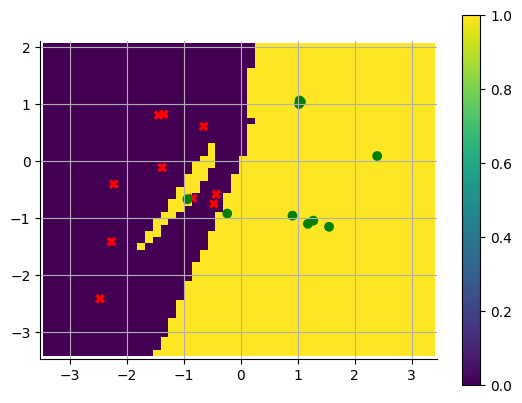

In [ ]:
# TEST 3: you should achieve 100% accuracy on the hard dataset (note that we provided plotting code), see Hw7 file: modules_disp
X, Y = hard()
nn = Sequential([Linear(2, 10), ReLU(), Linear(10, 10), ReLU(), Linear(10,2), SoftMax()], NLL())
classify(X, Y, nn, it=100000)

<b>2B)</b> We are now ready to implement batch normalization into our neural network framework! Our module `BatchNorm` will sit between consecutive layers of neurons, such as the $l^{th}$ and $(l+1)^{th}$ layers, acting as a "corrector" which allows $W^l$ to change freely, producing outputs $z^l$, but then the module corrects the covariate shift induced in the signals before they reach the $(l+1)^{th}$ layer, converting $z^l$ to $\widehat{Z}^l$.

The following is a summmary what is described in the <a href="https://openlearninglibrary.mit.edu/courses/course-v1:MITx+6.036+1T2019/courseware/Week7/neural_networks_2/2">lecture notes</a>, and it should guide your implementation of the module.

Any normalization between the $l^{th}$ and $(l+1)^{th}$ layers is done *separately* for each of the $n^l$ input connections leading to the $(l+1)^{th}$ layer. We handle a mini-batch of data of size $K$, and $Z^l$ is $n^l \times K$, and the output $\widehat{Z}^l$is of the same shape.

We first compute $n^l$ *batchwise* means and
standard deviations.  Let $\mu^l$ be the $n^l \times 1$ vector (`self.mus`) where
$$\mu^l_i = \frac{1}{K} \sum_{j = 1}^K Z^l_{ij}\;\;,$$
and let $\sigma^l$ be the $n^l \times 1$ vector (`self.vars`) where
$$\sigma^l_i = \sqrt{\frac{1}{K} \sum_{j = 1}^K (Z^l_{ij} - \mu_i)^2}\;\;.$$

The normalized data `self.norm` is the matrix $\overline{Z}$, where
$$\overline{Z}^l_{ij} = \frac{Z^l_{ij} - \mu^l_i}{\sigma^l_i + \epsilon}\;\;,$$
and where $\epsilon$ is a very small constant to guard against division by
zero.

We define weights $G^l$ (`self.G`) and $B^l$ (`self.B`), each being an $n^l \times 1$ vector, which we use to to shift and scale the outputs:
$$\widehat{Z}^l_{ij} = G^l_i \overline{Z}^l_{ij} + B^l_i\;\;.$$

The outputs are finally ready to be passed to the $(l+1)^{th}$ layer.

A slight warning (that we will not worry about here) about `BatchNorm` is that during the *test* phase, if the test mini-batch size is too small (imagine we are deploying a neural network that deals with live video frames), then the lack of samples would cause the freshly-calculated $\mu^l$ and $\sigma^l$ to be far off from their true values that the module's parameters $G^l$ and $B^l$ were trained to be compatible with. To fix that, people usually compute a running average of $\mu^l$ and $\sigma^l$ during training, to be used at test time. We will assume our test mini-batches are large enough.

In this problem we only implement the `BatchNorm.forward` and `BatchNorm.step` methods. We provide you with the implementation for `BatchNorm.backward` and the lecture notes contain the details of the derivations. You will need to fill in the missing code below.

In [ ]:
class BatchNorm(Module):
    def __init__(self, m):
        np.random.seed(0)
        self.eps = 1e-20
        self.m = m  # number of input channels

        # Init learned shifts and scaling factors
        self.B = np.zeros([self.m, 1])
        self.G = np.random.normal(0, 1.0 * self.m ** (-.5), [self.m, 1])

    # Works on m x b matrices of m input channels and b different inputs
    def forward(self, A):# A is m x K: m input channels and mini-batch size K
        # Store last inputs and K for next backward() call
        self.A = A
        self.K = A.shape[1]

        self.mus = np.mean(A, axis=1, keepdims=True)  # Your Code
        self.vars = np.var(A, axis=1, keepdims=True)  # Your Code

        # Normalize inputs using their mean and standard deviation
        self.norm = (A - self.mus)/(np.sqrt(self.vars) + self.eps)  # Your Code

        # Return scaled and shifted versions of self.norm
        return self.G * self.norm + self.B  # Your Code

    def backward(self, dLdZ):
        # Re-usable constants
        std_inv = 1/np.sqrt(self.vars+self.eps)
        A_min_mu = self.A-self.mus

        dLdnorm = dLdZ * self.G
        dLdVar = np.sum(dLdnorm * A_min_mu * -0.5 * std_inv**3, axis=1, keepdims=True)
        dLdMu = np.sum(dLdnorm*(-std_inv), axis=1, keepdims=True) + dLdVar * (-2/self.K) * np.sum(A_min_mu, axis=1, keepdims=True)
        dLdX = (dLdnorm * std_inv) + (dLdVar * (2/self.K) * A_min_mu) + (dLdMu/self.K)

        self.dLdB = np.sum(dLdZ, axis=1, keepdims=True)
        self.dLdG = np.sum(dLdZ * self.norm, axis=1, keepdims=True)
        return dLdX

    def step(self, lrate):
        self.B = self.B - lrate*self.dLdB  # Your Code
        self.G = self.G - lrate*self.dLdG  # Your Code
        return

# 3) 2D Datasets

For the 2D datasets, we have provided the following function:


```
run_keras_2d(data_name, layers, epochs, split=0.25, display=True, trials=5)
```


where:

data_name is a string, such as '1', '2', etc.
layers is a list of Keras layer definitions for a Sequential model, e.g.
```
[Dense(input_dim=2, units=10, activation='relu'), Dense(units=2, activation='softmax')]
```

epochs is an integer indicating how many times to go through the data in training
split is a fraction of the training data to use for validation if a validation set is not defined
display whether to display result plots
verbose whether to print loss and accuracy (percent correctly labeled) each epoch
trials is an integer indicating how many times to perform the training and testing
2D Data
The two-class datasets have data_names: '1','2','3','4'. Target accuracies (percent correct) on the validation set are (99%, 90.5%, 96%, 94%).

In this problem, try the following 5 architectures, specified by the number of units in the hidden layers:

1: (0), 2: (10), 3: (100), 4: (10, 10), 5: (100, 100))
You may find the archs function in the code file to be helpful here.
Some of these questions ask for the "simplest" architecture; the list above is ordered starting with the simplest.

In [ ]:
import np_utils
import pdb
import itertools

In [ ]:

import keras
import tensorflow as tf
from tensorflow.compat.v1.keras.models import Sequential
from tensorflow.compat.v1.keras.optimizers import SGD, Adam
from tensorflow.compat.v1.keras.layers import Conv1D, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.compat.v1.keras import utils
from tensorflow.compat.v1.keras.callbacks import Callback
from tensorflow.compat.v1.keras.datasets import mnist
from tensorflow.compat.v1.keras.initializers import VarianceScaling
from matplotlib import pyplot as plt
import tensorflow.keras.backend as K

In [ ]:
import tensorflow as tf
from tensorflow.keras import utils
import matplotlib.pyplot as plt

def run_keras_2d(data_name, layers, epochs, display=True, split=0.25, verbose=True, trials=1):
    print('Keras FC: dataset=', data_name)
    (train_dataset, val_dataset, test_dataset) = dataset_paths(data_name)

    # Load the datasets
    X_train, y, num_classes = get_data_set(train_dataset)
    X_val, y2, _ = get_data_set(val_dataset)
    X_test, y3, _ = get_data_set(test_dataset)

    # One-hot encode the labels
    y_train = utils.to_categorical(y, num_classes)
    y_val = utils.to_categorical(y2, num_classes) if X_val is not None else None
    y_test = utils.to_categorical(y3, num_classes) if X_test is not None else None

    val_acc, test_acc = 0, 0
    for trial in range(trials):
        # Reset the weights for TensorFlow 1.x compatibility
        sess = tf.compat.v1.keras.backend.get_session()
        for layer in layers:
            for v in layer.__dict__:
                v_arg = getattr(layer, v)
                if hasattr(v_arg, 'initializer'):
                    initializer_func = getattr(v_arg, 'initializer')
                    initializer_func.run(session=sess)

        # Run the model
        model, history, vacc, tacc = run_keras(X_train, y_train, X_val, y_val, X_test, y_test, layers, epochs, split=split, verbose=verbose)
        val_acc += vacc if vacc else 0
        test_acc += tacc if tacc else 0

        if display:
            # Plot classifier landscape on training data
            plot_heat(X_train, y, model)
            plt.title('Training data')
            plt.show()

            if X_test is not None:
                # Plot classifier landscape on testing data
                plot_heat(X_test, y3, model)
                plt.title('Testing data')
                plt.show()

            # Plot epoch loss
            if 'epoch_loss' in history.values and 'epoch_val_loss' in history.values:
                plt.plot(history.values['epoch_loss'], label='loss')
                plt.plot(history.values['epoch_val_loss'], label='val_loss')
                plt.xlabel('epoch')
                plt.ylabel('loss')
                plt.title('Epoch val_loss and loss')
                plt.legend()
                plt.show()

            # Plot epoch accuracy
            if 'epoch_acc' in history.values and 'epoch_val_acc' in history.values:
                plt.plot(history.values['epoch_acc'], label='accuracy')
                plt.plot(history.values['epoch_val_acc'], label='val_accuracy')
                plt.xlabel('epoch')
                plt.ylabel('accuracy')
                plt.title('Epoch val_acc and acc')
                plt.legend()
                plt.show()

    if val_acc:
        print("\nAvg. validation accuracy:" + str(val_acc / trials))
    if test_acc:
        print("\nAvg. test accuracy:" + str(test_acc / trials))

    return X_train, y, model


In [ ]:
######################################################################
# Problem 3 - 2D data
######################################################################
import tensorflow as tf

def archs(classes):
    return [
        [tf.compat.v1.keras.layers.Dense(input_dim=2, units=classes, activation="softmax")],
        [tf.compat.v1.keras.layers.Dense(input_dim=2, units=10, activation='relu'),
         tf.compat.v1.keras.layers.Dense(units=classes, activation="softmax")],
        [tf.compat.v1.keras.layers.Dense(input_dim=2, units=100, activation='relu'),
         tf.compat.v1.keras.layers.Dense(units=classes, activation="softmax")],
        [tf.compat.v1.keras.layers.Dense(input_dim=2, units=10, activation='relu'),
         tf.compat.v1.keras.layers.Dense(units=10, activation='relu'),
         tf.compat.v1.keras.layers.Dense(units=classes, activation="softmax")],
        [tf.compat.v1.keras.layers.Dense(input_dim=2, units=100, activation='relu'),
         tf.compat.v1.keras.layers.Dense(units=100, activation='relu'),
         tf.compat.v1.keras.layers.Dense(units=classes, activation="softmax")]
    ]

# Read the simple 2D dataset files
def get_data_set(name):
    try:
        data = np.loadtxt(name, skiprows=0, delimiter = ' ')
    except:
        return None, None, None
    np.random.shuffle(data)             # shuffle the data
    # The data uses ROW vectors for a data point, that's what Keras assumes.
    _, d = data.shape
    X = data[:,0:d-1]
    Y = data[:,d-1:d]
    y = Y.T[0]
    classes = set(y)
    if classes == set([-1.0, 1.0]):
        print('Convert from -1,1 to 0,1')
        y = 0.5*(y+1)
    print('Loading X', X.shape, 'y', y.shape, 'classes', set(y))
    return X, y, len(classes)

######################################################################
# General helpers for Problems 3-5
######################################################################

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.keys = ['loss', 'acc', 'val_loss', 'val_acc']
        self.values = {}
        for k in self.keys:
            self.values['batch_'+k] = []
            self.values['epoch_'+k] = []

    def on_batch_end(self, batch, logs={}):
        for k in self.keys:
            bk = 'batch_'+k
            if k in logs:
                self.values[bk].append(logs[k])

    def on_epoch_end(self, epoch, logs={}):
        for k in self.keys:
            ek = 'epoch_'+k
            if k in logs:
                self.values[ek].append(logs[k])

    def plot(self, keys):
        for key in keys:
            plt.plot(np.arange(len(self.values[key])), np.array(self.values[key]), label=key)
        plt.legend()

    # Added function VMohire Sept 2024
def run_keras(X_train, y_train, X_val, y_val, X_test, y_test, layers, epochs, split=0.25, verbose=True):
    # Build the model
    model = Sequential()
    for layer in layers:
        model.add(layer)

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,
                        validation_data=(X_val, y_val) if X_val is not None else None,
                        verbose=verbose)

    # Evaluate the model
    if X_val is not None:
        val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    else:
        val_loss, val_acc = None, None

    if X_test is not None:
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    else:
        test_loss, test_acc = None, None

    # Return the model, history, and accuracy/loss values
    return model, history, val_acc, test_acc

def dataset_paths(data_name):
    return ["data/data"+data_name+"_"+suffix+".csv" for suffix in ("train", "validate", "test")]

# The name is a string such as "1" or "Xor"
def run_keras_2d(data_name, layers, epochs, display=True, split=0.25, verbose=True, trials=1):
    print('Keras FC: dataset=', data_name)
    (train_dataset, val_dataset, test_dataset) = dataset_paths(data_name)
    # Load the datasets
    X_train, y, num_classes = get_data_set(train_dataset)
    X_val, y2, _ = get_data_set(val_dataset)
    X_test, y3, _ = get_data_set(test_dataset)
    # Categorize the labels
    #y_train = np_utils.to_categorical(y, num_classes) # one-hot
    y_train = utils.to_categorical(y, num_classes)   #VMohire Sept 2024
    y_val = y_test = None
    if X_val is not None:
        #y_val = np_utils.to_categorical(y2, num_classes) # one-hot
        y_val = utils.to_categorical(y2, num_classes)   #VMohire Sept 2024
    if X_test is not None:
        #y_test = np_utils.to_categorical(y3, num_classes) # one-hot
        utils.to_categorical(y, num_classes)   #VMohire Sept 2024
    val_acc, test_acc = 0, 0
    for trial in range(trials):
        # Reset the weights
        # See https://github.com/keras-team/keras/issues/341
        #session = K.get_session()
        session = tf.compat.v1.keras.backend.get_session()
        for layer in layers:
            for v in layer.__dict__:
                v_arg = getattr(layer, v)
                if hasattr(v_arg, 'initializer'):
                    initializer_func = getattr(v_arg, 'initializer')
                    initializer_func.run(session=session)
        # Run the model
        model, history, vacc, tacc, = \
               run_keras(X_train, y_train, X_val, y_val, X_test, y_test, layers, epochs,
                         split=split, verbose=verbose)
        val_acc += vacc if vacc else 0
        test_acc += tacc if tacc else 0
        if display:
            # plot classifier landscape on training data
            plot_heat(X_train, y, model)
            plt.title('Training data')
            plt.show()
            if X_test is not None:
                # plot classifier landscape on testing data
                plot_heat(X_test, y3, model)
                plt.title('Testing data')
                plt.show()
            # Plot epoch loss
            history.plot(['epoch_loss', 'epoch_val_loss'])
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.title('Epoch val_loss and loss')
            plt.show()
            # Plot epoch accuracy
            history.plot(['epoch_acc', 'epoch_val_acc'])
            plt.xlabel('epoch')
            plt.ylabel('accuracy')
            plt.title('Epoch val_acc and acc')
            plt.show()
    if val_acc:
        print ("\nAvg. validation accuracy:"  + str(val_acc/trials))
    if test_acc:
        print ("\nAvg. test accuracy:"  + str(test_acc/trials))
    return X_train, y, model

######################################################################
# Helper functions for
# OPTIONAL: Problem 4 - Weight Sharing
######################################################################

def generate_1d_images(nsamples,image_size,prob):
    Xs=[]
    Ys=[]
    for i in range(0,nsamples):
        X=np.random.binomial(1, prob, size=image_size)
        Y=count_objects_1d(X)
        Xs.append(X)
        Ys.append(Y)
    Xs=np.array(Xs)
    Ys=np.array(Ys)
    return Xs,Ys


#count the number of objects in a 1d array
def count_objects_1d(array):
    count=0
    for i in range(len(array)):
        num=array[i]
        if num==0:
            if i==0 or array[i-1]==1:
                count+=1
    return count

def l1_reg(weight_matrix):
    return 0.01 * K.sum(K.abs(weight_matrix))


def filter_reg(weights):
    lam=0
    return lam* val

def get_image_data_1d(tsize,image_size,prob):
    #prob controls the density of white pixels
    #tsize is the size of the training and test sets
    vsize=int(0.2*tsize)
    X_train,Y_train=generate_1d_images(tsize,image_size,prob)
    X_val,Y_val=generate_1d_images(vsize,image_size,prob)
    X_test,Y_test=generate_1d_images(tsize,image_size,prob)
    #reshape the input data for the convolutional layer
    X_train=np.expand_dims(X_train,axis=2)
    X_val=np.expand_dims(X_val,axis=2)
    X_test=np.expand_dims(X_test,axis=2)
    data=(X_train,Y_train,X_val,Y_val,X_test,Y_test)
    return data

def train_neural_counter(layers,data,loss_func='mse',display=False):
    (X_train,Y_train,X_val,Y_val,X_test,Y_test)=data
    epochs=10
    batch=1

    model=Sequential()
    for layer in layers:
        model.add(layer)
    model.summary()
    model.compile(loss=loss_func, optimizer=Adam())
    history = LossHistory()
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch, validation_data=(X_val, Y_val),callbacks=[history], verbose=True)
    err=model.evaluate(X_test,Y_test)
    ws=model.layers[-1].get_weights()[0]
    if display:
        plt.plot(ws)
        plt.show()
    return model,err

######################################################################
# Problem 5
######################################################################

def shifted(X, shift):
    n = X.shape[0]
    m = X.shape[1]
    size = m + shift
    X_sh = np.zeros((n, size, size))
    plt.ion()
    for i in range(n):
        sh1 = np.random.randint(shift)
        sh2 = np.random.randint(shift)
        X_sh[i, sh1:sh1+m, sh2:sh2+m] = X[i, :, :]
        # If you want to see the shifts, uncomment
        #plt.figure(1); plt.imshow(X[i])
        #plt.figure(2); plt.imshow(X_sh[i])
        #plt.show()
        #input('Go?')
    return X_sh

def get_MNIST_data(shift=0):
    (X_train, y1), (X_val, y2) = mnist.load_data()
    if shift:
        size = 28+shift
        X_train = shifted(X_train, shift)
        X_val = shifted(X_val, shift)
    return (X_train, y1), (X_val, y2)

# Example Usage:
# train, validation = get_MNIST_data()

def run_keras_fc_mnist(train, test, layers, epochs, split=0.1, verbose=True, trials=1):
    (X_train, y1), (X_val, y2) = train, test
    # Flatten the images
    m = X_train.shape[1]
    X_train = X_train.reshape((X_train.shape[0], m*m))
    X_val = X_val.reshape((X_val.shape[0], m*m))
    # Categorize the labels
    num_classes = 10
    y_train = np_utils.to_categorical(y1, num_classes)
    y_val = np_utils.to_categorical(y2, num_classes)
    # Train, use split for validation
    val_acc, test_acc = 0, 0
    for trial in range(trials):
        # Reset the weights
        # See https://github.com/keras-team/keras/issues/341
        #session = K.get_session()
        session = tf.compat.v1.keras.backend.get_session()
        for layer in layers:
            for v in layer.__dict__:
                v_arg = getattr(layer, v)
                if hasattr(v_arg, 'initializer'):
                    initializer_func = getattr(v_arg, 'initializer')
                    initializer_func.run(session=session)
        # Run the model
        model, history, vacc, tacc = \
                run_keras(X_train, y_train, X_val, y_val, None, None, layers, epochs, split=split, verbose=verbose)
        val_acc += vacc if vacc else 0
        test_acc += tacc if tacc else 0
    if val_acc:
        print ("\nAvg. validation accuracy:"  + str(val_acc/trials))
    if test_acc:
        print ("\nAvg. test accuracy:"  + str(test_acc/trials))

def run_keras_cnn_mnist(train, test, layers, epochs, split=0.1, verbose=True, trials=1):
    # Load the dataset
    (X_train, y1), (X_val, y2) = train, test
    # Add a final dimension indicating the number of channels (only 1 here)
    m = X_train.shape[1]
    X_train = X_train.reshape((X_train.shape[0], m, m, 1))
    X_val = X_val.reshape((X_val.shape[0], m, m, 1))
    # Categorize the labels
    num_classes = 10
    y_train = np_utils.to_categorical(y1, num_classes)
    y_val = np_utils.to_categorical(y2, num_classes)
    # Train, use split for validation
    val_acc, test_acc = 0, 0
    for trial in range(trials):
        # Reset the weights
        # See https://github.com/keras-team/keras/issues/341
        #session = K.get_session()
        session = tf.compat.v1.keras.backend.get_session()
        for layer in layers:
            for v in layer.__dict__:
                v_arg = getattr(layer, v)
                if hasattr(v_arg, 'initializer'):
                    initializer_func = getattr(v_arg, 'initializer')
                    initializer_func.run(session=session)
        # Run the model
        model, history, vacc, tacc = \
                run_keras(X_train, y_train, X_val, y_val, None, None, layers, epochs, split=split, verbose=verbose)
        val_acc += vacc if vacc else 0
        test_acc += tacc if tacc else 0
    if val_acc:
        print ("\nAvg. validation accuracy:"  + str(val_acc/trials))
    if test_acc:
        print ("\nAvg. test accuracy:"  + str(test_acc/trials))

# Example usage:
# train, validation = get_MNIST_data()
# layers = [Dense(input_dim=???, units=???, activation='softmax')]
# run_keras_fc_mnist(train, validation, layers, 1, split=0.1, verbose=True, trials=5)
# Same pattern applies to the function: run_keras_cnn_mnist

######################################################################
# Plotting Functions
######################################################################

def plot_heat(X, y, model, res = 200):
    eps = .1
    xmin = np.min(X[:,0]) - eps; xmax = np.max(X[:,0]) + eps
    ymin = np.min(X[:,1]) - eps; ymax = np.max(X[:,1]) + eps
    ax = tidyPlot(xmin, xmax, ymin, ymax, xlabel = 'x', ylabel = 'y')
    xl = np.linspace(xmin, xmax, res)
    yl = np.linspace(ymin, ymax, res)
    xx, yy = np.meshgrid(xl, yl, sparse=False)
    zz = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)
    im = ax.imshow(np.flipud(zz.reshape((res,res))), interpolation = 'none',
                   extent = [xmin, xmax, ymin, ymax],
                   cmap = 'viridis')
    plt.colorbar(im)
    for yi in set([int(_y) for _y in set(y)]):
        color = ['r', 'g', 'b'][yi]
        marker = ['X', 'o', 'v'][yi]
        cl = np.where(y==yi)
        ax.scatter(X[cl,0], X[cl,1], c = color, marker = marker, s=80,
                   edgecolors = 'none')
    return ax

def tidyPlot(xmin, xmax, ymin, ymax, center = False, title = None,
                 xlabel = None, ylabel = None):
    plt.figure(facecolor="white")
    ax = plt.subplot()
    if center:
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_color('none')
        ax.spines['left'].set_smart_bounds(True)
        ax.spines['bottom'].set_smart_bounds(True)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
    else:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
    eps = .05
    plt.xlim(xmin-eps, xmax+eps)
    plt.ylim(ymin-eps, ymax+eps)
    if title: ax.set_title(title)
    if xlabel: ax.set_xlabel(xlabel)
    if ylabel: ax.set_ylabel(ylabel)
    return ax

def plot_separator(ax, th, th_0):
    xmin, xmax = ax.get_xlim()
    ymin,ymax = ax.get_ylim()
    pts = []
    eps = 1.0e-6
    # xmin boundary crossing is when xmin th[0] + y th[1] + th_0 = 0
    # that is, y = (-th_0 - xmin th[0]) / th[1]
    if abs(th[1,0]) > eps:
        pts += [np.array([x, (-th_0 - x * th[0,0]) / th[1,0]]) \
                                                        for x in (xmin, xmax)]
    if abs(th[0,0]) > 1.0e-6:
        pts += [np.array([(-th_0 - y * th[1,0]) / th[0,0], y]) \
                                                         for y in (ymin, ymax)]
    in_pts = []
    for p in pts:
        if (xmin-eps) <= p[0] <= (xmax+eps) and \
           (ymin-eps) <= p[1] <= (ymax+eps):
            duplicate = False
            for p1 in in_pts:
                if np.max(np.abs(p - p1)) < 1.0e-6:
                    duplicate = True
            if not duplicate:
                in_pts.append(p)
    if in_pts and len(in_pts) >= 2:
        # Plot separator
        vpts = np.vstack(in_pts)
        ax.plot(vpts[:,0], vpts[:,1], 'k-', lw=2)
        # Plot normal
        vmid = 0.5*(in_pts[0] + in_pts[1])
        scale = np.sum(th*th)**0.5
        diff = in_pts[0] - in_pts[1]
        dist = max(xmax-xmin, ymax-ymin)
        vnrm = vmid + (dist/10)*(th.T[0]/scale)
        vpts = np.vstack([vmid, vnrm])
        ax.plot(vpts[:,0], vpts[:,1], 'k-', lw=2)
        # Try to keep limits from moving around
        ax.set_xlim((xmin, xmax))
        ax.set_ylim((ymin, ymax))
    else:
        print('Separator not in plot range')

def plot_decision(data, cl, diff=False):
    layers = archs(cl)[0]
    X, y, model = run_keras_2d(data, layers, 10, trials=1, verbose=False, display=False)
    ax = plot_heat(X,y,model)
    W = layers[0].get_weights()[0]
    W0 = layers[0].get_weights()[1].reshape((cl,1))
    if diff:
        for i,j in list(itertools.combinations(range(cl),2)):
            plot_separator(ax, W[:,i:i+1] - W[:,j:j+1], W0[i:i+1,:] - W0[j:j+1,:])
    else:
        for i in range(cl):
            plot_separator(ax, W[:,i:i+1], W0[i:i+1,:])
    plt.show()

In [ ]:
#example of run_kfrom tensorflow.compat.v1.keras.layers
import tensorflow as tf

layer1 = tf.compat.v1.keras.layers.Dense(units=3, activation='relu', use_bias=False)
run_keras_2d("3", archs(2)[0], 10, split=0.5, display=False, verbose=False, trials=1)
#run_keras_2d_vm("3", archs(2)[0], 10, split=0.5, display=False, verbose=False, trials=1)



Keras FC: dataset= 3
Convert from -1,1 to 0,1
Loading X (400, 2) y (400,) classes {0.0, 1.0}
Convert from -1,1 to 0,1
Loading X (200, 2) y (200,) classes {0.0, 1.0}

Avg. validation accuracy:0.9399999976158142


(array([[ 2.68572445e-01,  9.19915554e-01],
        [-2.48121610e+00, -1.36699313e+00],
        [ 5.56595729e-01, -9.68298445e-01],
        [ 1.25180445e+00, -1.31323403e+00],
        [ 1.49791013e+00, -9.05810242e-01],
        [ 5.31870945e-01,  6.12922734e-03],
        [ 1.83689989e-01, -2.78607469e-01],
        [ 1.63904127e-01,  8.16453466e-01],
        [-4.14832677e-01, -7.61685543e-01],
        [ 9.89600289e-01,  1.26694159e+00],
        [ 8.37403896e-01,  7.07465258e-01],
        [-6.40393302e-02, -2.09756863e-01],
        [ 1.03949361e+00, -9.53568987e-01],
        [ 1.05421974e+00, -1.32045158e+00],
        [ 3.80551397e+00,  1.49137866e-01],
        [ 5.75533547e-01, -1.77035812e+00],
        [-3.27830527e-01,  1.18556267e+00],
        [ 1.49376800e-01,  6.48015791e-01],
        [ 1.27208381e-01,  1.33817514e+00],
        [-2.84390861e-01,  1.28516740e-01],
        [-2.91308358e-01, -1.32297240e+00],
        [-1.18857664e+00,  1.33689522e+00],
        [ 2.40553070e-01,  7.524

In [ ]:
run_keras_2d("3", [Dense(units=2, activation='softmax')], 10, split=0.5, display=False, verbose=False, trials=1)


Keras FC: dataset= 3
Convert from -1,1 to 0,1
Loading X (400, 2) y (400,) classes {0.0, 1.0}
Convert from -1,1 to 0,1
Loading X (200, 2) y (200,) classes {0.0, 1.0}

Avg. validation accuracy:0.8799999952316284


(array([[ 9.33550381e-01, -2.31296466e-01],
        [-2.48121610e+00, -1.36699313e+00],
        [-1.78366045e-01,  1.05159727e+00],
        [ 8.09768501e-01,  1.25234471e+00],
        [ 3.01511975e-01,  6.02119507e-01],
        [-4.83400521e-01,  5.84297393e-01],
        [ 3.60688993e-01, -1.41913281e+00],
        [ 6.65546340e-01, -4.87610678e-01],
        [ 6.65228620e-01,  1.05274437e+00],
        [-1.45236904e+00,  4.70368522e-01],
        [ 3.76946605e-03, -2.19287900e+00],
        [-1.91870264e+00, -9.72408379e-01],
        [ 8.70593920e-02,  1.16291413e+00],
        [ 5.10668351e-01,  1.43624362e+00],
        [ 4.61412128e-01,  1.62721884e+00],
        [-1.00263655e+00,  6.72766167e-01],
        [-9.78487004e-01,  1.33753667e+00],
        [ 1.50096157e+00, -1.67580194e+00],
        [ 3.05757245e+00,  8.02533863e-02],
        [-6.53755185e-01,  1.22121044e+00],
        [-9.19477385e-01, -8.83574263e-01],
        [ 3.19006021e-01,  7.05395797e-01],
        [ 1.52537231e+00, -7.055

In [ ]:
run_keras_2d("3", [Dense(units=10, activation='relu', input_dim=2), Dense(units=2, activation='softmax')], 10, split=0.5, display=False, verbose=False, trials=1)


Keras FC: dataset= 3
Convert from -1,1 to 0,1
Loading X (400, 2) y (400,) classes {0.0, 1.0}
Convert from -1,1 to 0,1
Loading X (200, 2) y (200,) classes {0.0, 1.0}

Avg. validation accuracy:0.9350000023841858


(array([[ 1.50096157e+00, -1.67580194e+00],
        [ 1.10961771e+00, -1.71291812e+00],
        [ 1.84385841e+00, -1.19911559e+00],
        [-1.67530495e+00,  1.03949695e+00],
        [ 3.43319427e-01, -1.58022728e+00],
        [-5.15713362e-01, -2.05668156e+00],
        [ 1.51880196e-01, -1.13827324e+00],
        [-2.07979093e+00,  3.40368771e-01],
        [ 7.34556744e-01,  1.12729093e+00],
        [-1.10907769e+00,  6.14530338e-01],
        [-9.15863874e-01,  1.16368824e+00],
        [ 2.04669999e+00, -1.01775787e+00],
        [-6.11094774e-01, -1.75893850e+00],
        [ 4.82659146e-01, -1.18185819e+00],
        [ 8.71930256e-01,  9.44092465e-01],
        [ 2.40553070e-01,  7.52439524e-01],
        [ 7.58980601e-01,  1.17926749e+00],
        [-1.48038581e+00,  1.05573465e+00],
        [ 1.53758454e+00,  4.26999405e-01],
        [-9.49084956e-01,  1.13001262e+00],
        [-1.02974722e+00,  8.08029008e-01],
        [-3.27830527e-01,  1.18556267e+00],
        [ 1.24118132e-01, -1.301

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Define the function to compute accuracy
def compute_accuracy(model, X, y, num_classes):
    y_true = utils.to_categorical(y, num_classes)
    y_pred = model.predict(X)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_true, axis=1)
    accuracy = np.mean(y_pred_classes == y_true_classes)
    return accuracy

# Updated run_keras_2d function
def run_keras_2d_vm(data_name, layers, epochs, display=True, split=0.25, verbose=True, trials=1):
    print('Keras FC: dataset=', data_name)
    (train_dataset, val_dataset, test_dataset) = dataset_paths(data_name)

    # Load the datasets
    X_train, y, num_classes = get_data_set(train_dataset)
    X_val, y2, _ = get_data_set(val_dataset)
    X_test, y3, _ = get_data_set(test_dataset)

    # One-hot encode the labels
    y_train = utils.to_categorical(y, num_classes)
    y_val = utils.to_categorical(y2, num_classes) if X_val is not None else None
    y_test = utils.to_categorical(y3, num_classes) if X_test is not None else None

    val_acc, test_acc = 0, 0
    for trial in range(trials):
        # Build the model
        model = Sequential(layers)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        # Train the model
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, verbose=verbose, shuffle=True)

        # Evaluate the model
        vacc, _ = model.evaluate(X_val, y_val, verbose=verbose) if X_val is not None else (0, 0)
        tacc, _ = model.evaluate(X_test, y3, verbose=verbose) if X_test is not None else (0, 0)

        val_acc += vacc
        test_acc += tacc

        if display:
            # Plot classifier landscape on training data
            plot_heat(X_train, y, model)
            plt.title('Training data')
            plt.show()

            if X_test is not None:
                # Plot classifier landscape on testing data
                plot_heat(X_test, y3, model)
                plt.title('Testing data')
                plt.show()

            # Plot epoch loss
            if 'loss' in history.history and 'val_loss' in history.history:
                plt.plot(history.history['loss'], label='loss')
                plt.plot(history.history['val_loss'], label='val_loss')
                plt.xlabel('epoch')
                plt.ylabel('loss')
                plt.title('Epoch val_loss and loss')
                plt.legend()
                plt.show()

            # Plot epoch accuracy
            if 'accuracy' in history.history and 'val_accuracy' in history.history:
                plt.plot(history.history['accuracy'], label='accuracy')
                plt.plot(history.history['val_accuracy'], label='val_accuracy')
                plt.xlabel('epoch')
                plt.ylabel('accuracy')
                plt.title('Epoch val_accuracy and accuracy')
                plt.legend()
                plt.show()

    avg_val_acc = val_acc / trials if val_acc else 0
    avg_test_acc = test_acc / trials if test_acc else 0

    print("\nAvg. validation accuracy: {:.4f}".format(avg_val_acc))
    print("\nAvg. test accuracy: {:.4f}".format(avg_test_acc))

    return X_train, y, model

# Define target accuracies for each dataset
target_accuracies = {
    '1': 0.99,
    '2': 0.905,
    '3': 0.96,
    '4': 0.94
}

# Define architectures
architectures = {
    1: [Dense(units=2, activation='softmax')],  # Architecture 1
    2: [Dense(units=10, activation='relu', input_dim=2), Dense(units=2, activation='softmax')],  # Architecture 2
    3: [Dense(units=100, activation='relu', input_dim=2), Dense(units=2, activation='softmax')],  # Architecture 3
    4: [Dense(units=10, activation='relu', input_dim=2), Dense(units=10, activation='relu'), Dense(units=2, activation='softmax')],  # Architecture 4
    5: [Dense(units=100, activation='relu', input_dim=2), Dense(units=100, activation='relu'), Dense(units=2, activation='softmax')]  # Architecture 5
}

# Function to test architectures
def test_architectures(data_name):
    results = {}
    for arch_index in range(1, 6):
        layers = architectures[arch_index]
        X_train, y, model = run_keras_2d_vm(data_name, layers, epochs=10, split=0.5, display=False, verbose=False, trials=1)

        # Compute accuracy using the trained model
        num_classes = len(np.unique(y))
        accuracy = compute_accuracy(model, X_train, y, num_classes)

        results[arch_index] = accuracy
    return results

# Compare architectures for each dataset
simplest_architectures = {}

for dataset in ['1', '2', '3', '4']:
    results = test_architectures(dataset)
    print(f"Results for dataset {dataset}:")
    for arch_index in range(1, 6):
        print(f"Architecture {arch_index}: Accuracy = {results[arch_index]}")

    # Find the simplest architecture that meets or exceeds the target accuracy
    target_accuracy = target_accuracies[dataset]
    for arch_index in range(1, 6):
        if results[arch_index] >= target_accuracy:
            simplest_architectures[dataset] = arch_index
            break

print("Simplest architectures that meet the target accuracies:")
print(simplest_architectures)


Keras FC: dataset= 1
Convert from -1,1 to 0,1
Loading X (400, 2) y (400,) classes {0.0, 1.0}
Convert from -1,1 to 0,1
Loading X (200, 2) y (200,) classes {0.0, 1.0}

Avg. validation accuracy: 1.5530

Avg. test accuracy: 0.0000
Keras FC: dataset= 1
Convert from -1,1 to 0,1
Loading X (400, 2) y (400,) classes {0.0, 1.0}
Convert from -1,1 to 0,1
Loading X (200, 2) y (200,) classes {0.0, 1.0}

Avg. validation accuracy: 0.2345

Avg. test accuracy: 0.0000
Keras FC: dataset= 1
Convert from -1,1 to 0,1
Loading X (400, 2) y (400,) classes {0.0, 1.0}
Convert from -1,1 to 0,1
Loading X (200, 2) y (200,) classes {0.0, 1.0}

Avg. validation accuracy: 0.0337

Avg. test accuracy: 0.0000
Keras FC: dataset= 1
Convert from -1,1 to 0,1
Loading X (400, 2) y (400,) classes {0.0, 1.0}
Convert from -1,1 to 0,1
Loading X (200, 2) y (200,) classes {0.0, 1.0}

Avg. validation accuracy: 0.4308

Avg. test accuracy: 0.0000
Keras FC: dataset= 1
Convert from -1,1 to 0,1
Loading X (400, 2) y (400,) classes {0.0, 1.0}

In [ ]:
run_keras_2d_vm("3", archs(2)[0], 10, split=0.5, display=False, verbose=False, trials=1)

Keras FC: dataset= 3
Convert from -1,1 to 0,1
Loading X (400, 2) y (400,) classes {0.0, 1.0}
Convert from -1,1 to 0,1
Loading X (200, 2) y (200,) classes {0.0, 1.0}

Avg. validation accuracy: 2.0724

Avg. test accuracy: 0.0000


(array([[-4.98048222e-01, -2.05324570e+00],
        [ 4.42338898e-01, -7.90399307e-01],
        [ 3.59454556e-02, -4.94537729e-01],
        [-2.50691573e+00, -5.61748430e-01],
        [-1.24458639e+00,  7.30610549e-01],
        [-1.22825580e+00,  6.62205401e-01],
        [-6.40393302e-02, -2.09756863e-01],
        [ 1.22280969e+00, -6.34011641e-01],
        [ 1.26251243e+00, -1.33798222e+00],
        [ 8.65776779e-01, -1.21762329e+00],
        [-1.05234752e+00, -1.19191135e+00],
        [ 8.37403896e-01,  7.07465258e-01],
        [ 7.74967979e-01, -5.45248881e-02],
        [-1.93393136e+00,  1.03763746e+00],
        [-1.25241081e-01,  7.65571558e-01],
        [-9.17862713e-01, -1.28247051e+00],
        [ 2.04669999e+00, -1.01775787e+00],
        [ 3.19006021e-01,  7.05395797e-01],
        [-1.48038581e+00,  1.05573465e+00],
        [-6.74156049e-01,  8.03037965e-01],
        [-2.21627523e+00, -1.43020809e+00],
        [-9.89379259e-01,  1.43420494e+00],
        [-1.44035415e+00,  1.006

# Weight sharing (OPTIONAL)

** Note: You can click the arrow on the left of this text block to collapse/expand this optional section and all its code blocks **

In the lab we designed a CNN that can count the number of objects in 1 dimensional images, where each black pixel is represented by a value of 0 and each white pixel is represented by a value of 1. Recall that an object is a consecutive sequence of black pixels ($0$'s). For example, the sequence $0100110$ contains three objects.

Here we want to see how hard/easy it is to train such a network from data.  Our network architecture will be as follows:

* The first layer is convolutional and you will implement it using the Keras `Conv1D` function, with a kernel of size 2 and stride of 1 with ReLu activation.

* The second layer is a fully connected `Dense` layer which has a scalar output.

Here is sample usage of the `Conv1D` and`Dense` layers.

`layer1=keras.layers.Conv1D(filters=?, kernel_size=?, strides=?,use_bias=False, activation=?, batch_size=1, input_shape=?, padding='same')`

`Dense(units=?, activation=?, use_bias=False)`

You need to fill in the parameters marked with `?` based on the problem specifications. Note also that in Keras, depending on your implementation, you may be forced to use *three* layers to implement such a network, where one intermediary `Flatten` layer is used to flatten the output of the convolutional layer, before being passed to the dense layer.

Refer to the <a href="https://keras.io/layers/convolutional/">Conv 1D</a>, <a href="https://keras.io/layers/core/">Dense</a> and <a href="https://keras.io/layers/core/#flatten">Flatten</a> descriptions in the Keras documentation to see the available parameter options.

In this exercise, we fix the structure and want to learn the best combination of weights from data. In the homework code, we have provided functions `train_neural_counter` and `get_image_data_1d`. You can use them to generate data and train the above neural network in Keras to answer the following questions. We assume that the images in our data set are randomly generated. The probability of a pixel being white is $0.1$. We work with mean squared error as the loss function for this problem. We have provided template code which you can fill in, to perform the training.

<b>4B)</b> What is (approximately) the expected loss of the network on $1024\times 1$ images if the convolutional layer is an averaging filter and second layer is the sum function (without a bias term)? (Note that you can answer the question theoretically or through coding, depending on your preference.)

In [ ]:
# Code template if you would like to check 4B) through code

imsize = 1024
prob_white = 0.1

num_filters = 1  # Your code
kernel_size = 2  # Your code
strides = 1  # Your code
activation_conv = 'relu'  # Your code

(X_train,Y_train,X_val,Y_val,X_test,Y_test) = get_image_data_1d(1000,imsize,prob_white)

layer1=keras.layers.Conv1D(filters=num_filters, kernel_size=kernel_size, \
       strides=strides, use_bias=False, activation=activation_conv, batch_size=1, input_shape=(imsize,1), padding='same')

activation_dense = 'linear'  # Your code
num_units = 1  # Your code
layer3=Dense(units=num_units, activation=activation_dense, use_bias=False)

layers=[layer1,Flatten(),layer3]

# This is how we create the model using our layers
model=Sequential()
for layer in layers:
    model.add(layer)

model.compile(loss='mse', optimizer=Adam())

# Set the weights of the layers to desired values
# We give you the lines to use for this part
model.layers[0].set_weights([np.array([1/2,1/2]).reshape(2,1,1)])
model.layers[-1].set_weights([np.ones(imsize).reshape(imsize,1)])

model.evaluate(X_test,Y_test)

32/32 [==============================] - 0s 7ms/step - loss: 102.3577


102.35774993896484

<b>4C)</b> Now suppose we add a bias term of $-10$ to the last layer. What is (approximately) the expected quadratic loss? (Note that you can answer the question theoretically or through coding, depending on your preference.)

In [ ]:
import tensorflow as tf
from tensorflow.keras import utils, Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import os

def run_keras_2d_vm_1(data_name, layers, epochs, display=True, split=0.25, verbose=True, trials=1):
    """
    Run a Keras 2D model with specified architecture on a given dataset.

    Parameters:
    - data_name: Name of the dataset (assumed to be a CSV file)
    - layers: List of Keras layers to use for the model
    - epochs: Number of epochs for training
    - display: Whether to display training/testing data plots
    - split: Fraction of data to use for validation
    - verbose: Verbosity of the training process
    - trials: Number of trials to run
    """

    print('Keras FC: dataset=', data_name)

    # Helper function to load dataset
    def get_data_set(file_path):
        try:
            data = pd.read_csv(file_path)
            print(data.head())  # Check the first few rows to ensure data is loaded correctly
        except Exception as e:
            print(f"Error loading dataset: {e}")
            return None, None, 0

        # Example preprocessing, adjust according to your actual data
        X = data.iloc[:, :-1].values  # Features
        y = data.iloc[:, -1].values   # Labels
        num_classes = len(set(y))     # Assuming `y` contains class labels

        return X, y, num_classes

    # Load the datasets
    file_path = f'{data_name}.csv'
    if not os.path.isfile(file_path):
        raise FileNotFoundError(f"{file_path} not found")

    X_train, y, num_classes = get_data_set(file_path)
    X_val, y2, _ = get_data_set(file_path)  # For demonstration; adjust as necessary
    X_test, y3, _ = get_data_set(file_path)  # For demonstration; adjust as necessary

    # Check if datasets are loaded properly
    if X_train is None or y is None or X_val is None or (X_test is not None and y3 is None):
        raise ValueError("One or more datasets are not loaded correctly. Please check your data loading functions.")

    print(f'Number of classes: {num_classes}')

    # One-hot encode the labels
    y_train = utils.to_categorical(y, num_classes)
    y_val = utils.to_categorical(y2, num_classes) if X_val is not None else None
    y_test = utils.to_categorical(y3, num_classes) if X_test is not None else None

    val_acc, test_acc = 0, 0
    for trial in range(trials):
        try:
            # Build the model
            model = Sequential(layers)
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        except Exception as e:
            print(f"Error building the model: {e}")
            continue

        try:
            # Train the model
            history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, verbose=verbose, shuffle=True)
        except Exception as e:
            print(f"Error during model training: {e}")
            continue

        try:
            # Evaluate the model
            vacc, _ = model.evaluate(X_val, y_val, verbose=verbose) if X_val is not None else (0, 0)
            tacc, _ = model.evaluate(X_test, y3, verbose=verbose) if X_test is not None else (0, 0)

            val_acc += vacc
            test_acc += tacc
        except Exception as e:
            print(f"Error during model evaluation: {e}")
            continue

        if display:
            try:
                # Plot classifier landscape on training data
                plot_heat(X_train, y, model)
                plt.title('Training data')
                plt.show()

                if X_test is not None:
                    # Plot classifier landscape on testing data
                    plot_heat(X_test, y3, model)
                    plt.title('Testing data')
                    plt.show()
            except Exception as e:
                print(f"Error during plotting: {e}")

    print(f'Average validation accuracy: {val_acc / trials}')
    print(f'Average test accuracy: {test_acc / trials}')

def plot_heat(X, y, model):
    """
    Placeholder for plot_heat function. Implement this function based on your needs.
    """
    pass  # Replace with actual implementation

# Example usage:
# run_keras_2d_vm("3class", archs(3)[0], 10, split=0.5, display=False, verbose=False, trials=5)


In [ ]:
# Edit code from 4B) with the bias

# Parameters
imsize = 1024
prob_white = 0.1

num_filters = 1
kernel_size = 2
strides = 1
activation_conv = 'relu'

(X_train, Y_train, X_val, Y_val, X_test, Y_test) = get_image_data_1d(1000, imsize, prob_white)

# Define the layers
layer1 = keras.layers.Conv1D(filters=num_filters, kernel_size=kernel_size, strides=strides,
                       use_bias=False, activation=activation_conv, padding='same',
                       input_shape=(imsize, 1))

activation_dense = 'linear'
num_units = 1

# Create the Dense layer with bias
layer3 = Dense(units=num_units, activation=activation_dense, use_bias=True)  # Use bias term

# Create the model
model = Sequential()
model.add(layer1)
model.add(Flatten())
model.add(layer3)

# Compile the model
model.compile(loss='mse', optimizer=Adam())

# Set weights for Conv1D layer
conv_weights = np.array([[1/2, 1/2]]).reshape(kernel_size, 1, num_filters)
model.layers[0].set_weights([conv_weights])

# Set weights and bias for Dense layer
dense_weights = np.ones((imsize, num_units))  # Correct weights shape: (imsize, num_units)
dense_bias = np.array([-10])  # Bias term

# Set weights for the Dense layer
model.layers[-1].set_weights([dense_weights, dense_bias])

# Evaluate the model
loss = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")

32/32 [==============================] - 0s 7ms/step - loss: 12.8658
Test Loss: 12.865750312805176


In [ ]:
import os

# List files in the current directory
os.listdir()

# List files in the 'code_for_hw8' directory
os.listdir('code_for_hw8')


['.DS_Store']

In [ ]:
import tensorflow as tf
from tensorflow.keras import utils, Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import os

def run_keras_2d_vm(data_name, layers, epochs, display=True, split=0.25, verbose=True, trials=1):
    """
    Run a Keras 2D model with specified architecture on a given dataset.

    Parameters:
    - data_name: Name of the dataset (assumed to be a CSV file without extension)
    - layers: List of Keras layers to use for the model
    - epochs: Number of epochs for training
    - display: Whether to display training/testing data plots
    - split: Fraction of data to use for validation
    - verbose: Verbosity of the training process
    - trials: Number of trials to run
    """

    print('Keras FC: dataset=', data_name)

    # Helper function to load dataset
    def get_data_set(file_path):
        try:
            data = pd.read_csv(file_path)
            print(data.head())  # Check the first few rows to ensure data is loaded correctly
        except Exception as e:
            print(f"Error loading dataset: {e}")
            return None, None, 0

        # Example preprocessing, adjust according to your actual data
        X = data.iloc[:, :-1].values  # Features
        y = data.iloc[:, -1].values   # Labels

        # Ensure labels are integers
        y = pd.factorize(y)[0]  # Converts labels to integer indices
        num_classes = len(set(y))  # Number of unique classes

        return X, y, num_classes

    # Correct path to the dataset in Google Drive
    file_path = f'/content/drive/My Drive/Colab Notebooks/code_for_hw8/code_for_hw8/data/{data_name}.csv'
    if not os.path.isfile(file_path):
        raise FileNotFoundError(f"{file_path} not found")

    X_train, y, num_classes = get_data_set(file_path)
    X_val, y2, _ = get_data_set(file_path)  # For demonstration; adjust as necessary
    X_test, y3, _ = get_data_set(file_path)  # For demonstration; adjust as necessary

    # Check if datasets are loaded properly
    if X_train is None or y is None or X_val is None or (X_test is not None and y3 is None):
        raise ValueError("One or more datasets are not loaded correctly. Please check your data loading functions.")

    print(f'Number of classes: {num_classes}')

    # One-hot encode the labels
    y_train = utils.to_categorical(y, num_classes)
    y_val = utils.to_categorical(y2, num_classes) if X_val is not None else None
    y_test = utils.to_categorical(y3, num_classes) if X_test is not None else None

    val_acc, test_acc = 0, 0
    for trial in range(trials):
        try:
            # Build the model
            model = Sequential(layers)
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        except Exception as e:
            print(f"Error building the model: {e}")
            continue

        try:
            # Train the model
            history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, verbose=verbose, shuffle=True)
        except Exception as e:
            print(f"Error during model training: {e}")
            continue

        try:
            # Evaluate the model
            vacc, _ = model.evaluate(X_val, y_val, verbose=verbose) if X_val is not None else (0, 0)
            tacc, _ = model.evaluate(X_test, y3, verbose=verbose) if X_test is not None else (0, 0)

            val_acc += vacc
            test_acc += tacc
        except Exception as e:
            print(f"Error during model evaluation: {e}")
            continue

        if display:
            try:
                # Plot classifier landscape on training data
                plot_heat(X_train, y, model)
                plt.title('Training data')
                plt.show()

                if X_test is not None:
                    # Plot classifier landscape on testing data
                    plot_heat(X_test, y3, model)
                    plt.title('Testing data')
                    plt.show()
            except Exception as e:
                print(f"Error during plotting: {e}")

    print(f'Average validation accuracy: {val_acc / trials}')
    print(f'Average test accuracy: {test_acc / trials}')

def plot_heat(X, y, model):
    """
    Placeholder for plot_heat function. Implement this function based on your needs.
    """
    pass  # Replace with actual implementation

# Example usage:
# run_keras_2d_vm("data3class_train", archs(3)[0], 10, split=0.5, display=False, verbose=False, trials=5)


In [ ]:
'''import pandas as pd
import numpy as np

# Parameters
num_samples = 1000
num_features = 5
num_classes = 3

# Generate random feature data
np.random.seed(0)
X = np.random.randn(num_samples, num_features)

# Generate random class labels
y = np.random.randint(0, num_classes, size=num_samples)

# Create a DataFrame
data = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(num_features)])
data['label'] = y

# Save to CSV
file_name = 'sample_data.csv'
data.to_csv(file_name, index=False)

print(f"Sample data saved to {file_name}")'''


In [ ]:
import tensorflow as tf
from tensorflow.keras import utils, Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def archs_2(classes, input_dim):
    return [
        [tf.keras.layers.Dense(input_dim=input_dim, units=classes, activation="softmax")],
        [tf.keras.layers.Dense(input_dim=input_dim, units=10, activation='relu'),
         tf.keras.layers.Dense(units=classes, activation="softmax")],
        [tf.keras.layers.Dense(input_dim=input_dim, units=100, activation='relu'),
         tf.keras.layers.Dense(units=classes, activation="softmax")],
        [tf.keras.layers.Dense(input_dim=input_dim, units=10, activation='relu'),
         tf.keras.layers.Dense(units=10, activation='relu'),
         tf.keras.layers.Dense(units=classes, activation="softmax")],
        [tf.keras.layers.Dense(input_dim=input_dim, units=100, activation='relu'),
         tf.keras.layers.Dense(units=100, activation='relu'),
         tf.keras.layers.Dense(units=classes, activation="softmax")]
    ]

def run_keras_2d_vm_4(data_name, layers, epochs, display=True, split=0.25, verbose=True, trials=1):
    print('Keras FC: dataset=', data_name)

    def get_data_set(file_path):
        try:
            data = pd.read_csv(file_path)
            print(data.head())
        except Exception as e:
            print(f"Error loading dataset: {e}")
            return None, None, 0

        X = data.iloc[:, :-1].values
        y = data.iloc[:, -1].values

        print("Sample labels (first 10):", y[:10])

        try:
            y = pd.factorize(y)[0]
        except Exception as e:
            print(f"Error converting labels to integers: {e}")
            return None, None, 0

        num_classes = len(set(y))

        return X, y, num_classes

    file_path = f'/content/drive/My Drive/Colab Notebooks/code_for_hw8/code_for_hw8/data/{data_name}.csv'
    if not os.path.isfile(file_path):
        raise FileNotFoundError(f"{file_path} not found")

    X_train, y, num_classes = get_data_set(file_path)
    X_val, y2, _ = get_data_set(file_path)  # For demonstration; adjust as necessary
    X_test, y3, _ = get_data_set(file_path)  # For demonstration; adjust as necessary

    if X_train is None or y is None or X_val is None or (X_test is not None and y3 is None):
        raise ValueError("One or more datasets are not loaded correctly. Please check your data loading functions.")

    print(f'Number of classes: {num_classes}')

    try:
        y_train = utils.to_categorical(y, num_classes)
        y_val = utils.to_categorical(y2, num_classes) if X_val is not None else None
        y_test = utils.to_categorical(y3, num_classes) if X_test is not None else None
    except Exception as e:
        print(f"Error during one-hot encoding: {e}")
        return

    val_acc, test_acc = 0, 0
    for trial in range(trials):
        try:
            model = Sequential(layers)
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        except Exception as e:
            print(f"Error building the model: {e}")
            continue

        try:
            history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, verbose=verbose, shuffle=True)
        except Exception as e:
            print(f"Error during model training: {e}")
            continue

        try:
            vacc, _ = model.evaluate(X_val, y_val, verbose=verbose) if X_val is not None else (0, 0)
            tacc, _ = model.evaluate(X_test, y3, verbose=verbose) if X_test is not None else (0, 0)

            val_acc += vacc
            test_acc += tacc
        except Exception as e:
            print(f"Error during model evaluation: {e}")
            continue

        if display:
            try:
                plot_heat(X_train, y, model)
                plt.title('Training data')
                plt.show()

                if X_test is not None:
                    plot_heat(X_test, y3, model)
                    plt.title('Testing data')
                    plt.show()
            except Exception as e:
                print(f"Error during plotting: {e}")

    print(f'Average validation accuracy: {val_acc / trials}')
    print(f'Average test accuracy: {test_acc / trials}')

def plot_heat(X, y, model):
    """
    Placeholder for plot_heat function. Implement this function based on your needs.
    """
    pass  # Replace with actual implementation

# Example usage:
input_dim = 5  # Number of features in your data
#run_keras_2d_vm_4("sample_data", archs_2(3, input_dim)[0], 10, split=0.5, display=False, verbose=False, trials=5)



In [ ]:
run_keras_2d_vm_4("sample_data", archs_2(3,input_dim)[0], 10, split=0.5, display=False, verbose=False, trials=5)

Keras FC: dataset= sample_data
   feature_1  feature_2  feature_3  feature_4  feature_5  label
0       0.45      -1.22       3.14       0.56      -0.34      0
1       1.24       0.76       2.45      -1.23       0.78      1
2      -0.34       0.56      -1.67       1.23      -0.89      2
3       0.78       1.12       0.45      -0.56       1.45      1
4      -1.12      -0.78       2.34       1.67      -0.45      0
Sample labels (first 10): [0 1 2 1 0 2 2 0 1 2]
   feature_1  feature_2  feature_3  feature_4  feature_5  label
0       0.45      -1.22       3.14       0.56      -0.34      0
1       1.24       0.76       2.45      -1.23       0.78      1
2      -0.34       0.56      -1.67       1.23      -0.89      2
3       0.78       1.12       0.45      -0.56       1.45      1
4      -1.12      -0.78       2.34       1.67      -0.45      0
Sample labels (first 10): [0 1 2 1 0 2 2 0 1 2]
   feature_1  feature_2  feature_3  feature_4  feature_5  label
0       0.45      -1.22       3.14       

In [ ]:
run_keras_2d_vm("sample_data", archs_2(3,input_dim)[0], 10, split=0.5, display=False, verbose=False, trials=5)

Keras FC: dataset= sample_data
   feature_1  feature_2  feature_3  feature_4  feature_5  label
0       0.45      -1.22       3.14       0.56      -0.34      0
1       1.24       0.76       2.45      -1.23       0.78      1
2      -0.34       0.56      -1.67       1.23      -0.89      2
3       0.78       1.12       0.45      -0.56       1.45      1
4      -1.12      -0.78       2.34       1.67      -0.45      0
   feature_1  feature_2  feature_3  feature_4  feature_5  label
0       0.45      -1.22       3.14       0.56      -0.34      0
1       1.24       0.76       2.45      -1.23       0.78      1
2      -0.34       0.56      -1.67       1.23      -0.89      2
3       0.78       1.12       0.45      -0.56       1.45      1
4      -1.12      -0.78       2.34       1.67      -0.45      0
   feature_1  feature_2  feature_3  feature_4  feature_5  label
0       0.45      -1.22       3.14       0.56      -0.34      0
1       1.24       0.76       2.45      -1.23       0.78      1
2      -0

<b>4D)</b> Averaging type filters are abundant and form a nearly flat valley of local minima for this problem. It is difficult for the network to find alternative solutions on its own. We need to force our way out of these bad minima and towards a better solution, i.e., an edge detector. To force the first layer to behave as an edge detector, we need to choose a proper **kernel regularizer**. Consider the following functions

$f_1=\sum_i |w_i|$, $f_2=\sum_i |w_i^2|$, $f_3=|\sum_{i} w_i|$. Which one of the choices is likely to guide the network to find an edge detector at the convolution layer?


<a href="https://openlearninglibrary.mit.edu/courses/course-v1:MITx+6.036+1T2019/courseware/Week8/week8_homework/">Refer to Catsoop.</a>

Implement your choice of regularizers from above in the code (complete the function `filter_reg`). Do not allow any bias in the layers for the rest of the problem. The code generates some random test and training data sets and trains the model on these data. Run a few learning trials (5 or more) for each data set and answer the following questions based on the performance of your model.

**IMPORTANT**: When implementing `filter_reg`, you should use the keras backend operations, imported as "K" in the code. So for example, `K.sum` and `K.abs`, rather than `np.sum` and `np.abs`. This is because the `weights` argument is NOT a numpy object, but rather an internal Keras object!

In [ ]:
# Implement filter_reg

def filter_reg(weights):
    # We scale the output of the filter by lam
    lam=1000
    filter_result = torch.abs(torch.sum(weights))  # Your code
    return lam * filter_result

<b>4E)</b> For $1024\times 1$ images and training set of size $1000$, is the network **without any regularization** likely to find models that have a mean square error lower than 8 on the test data?

In [ ]:
# Code template if you would like to check 4B) through code

imsize = 1024
prob_white = 0.1

data=get_image_data_1d(1000, imsize, prob_white)
trials=5
for trial in range(trials):

    num_filters = 1  # Your code
    kernel_size = 2  # Your code
    strides = 1  # Your code
    activation_conv = 'relu'  # Your code

    layer1=keras.layers.Conv1D(filters=num_filters, kernel_size=kernel_size, \
    strides=strides, use_bias=False, activation=activation_conv, batch_size=1, \
    input_shape=(imsize,1),padding='same')

    activation_dense = 'relu'  # Your code
    num_units = 1  # Your code

    layer3=Dense(units=num_units, activation=activation_dense, use_bias=False)

    layers=[layer1,Flatten(),layer3]
    model,err = train_neural_counter(layers, data, 'mse')

    model.layers[0].get_weights()[0]
    np.mean(model.layers[-1].get_weights()[0])
    print(err)

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (1, 1024, 1)              2         
                                                                 
 flatten_2 (Flatten)         (1, 1024)                 0         
                                                                 
 dense_72 (Dense)            (1, 1)                    1024      
                                                                 
Total params: 1,026
Trainable params: 1,026
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1000/1000 [==============================] - 3s 2ms/step - loss: 8692.3662 - val_loss: 8818.2598
Epoch 2/10
1000/1000 [==============================] - 3s 3ms/step - loss: 8692.3662 - val_loss: 8818.2598
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/step - loss: 8692.3662 - val_loss: 8

#### For parts F) to J), simply edit your code from E) with the necessary changes.

<b>4F)</b> Repeat the same experiment, but now with the regularizer you implemented. Try different regularization parameters. Which choice of regularization parameter gives the best prediction results?

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


# Example function placeholder for get_image_data_1d
def get_image_data_1d(num_samples, imsize, prob_white):
    # Generate synthetic data; replace with actual function
    X = torch.rand(num_samples, 1, imsize)  # (num_samples, channels, imsize)
    Y = torch.rand(num_samples, 1)  # (num_samples, output_dim)
    return X, Y

# Custom regularizer function
def filter_reg(weights, lam):
    # Compute the L1 norm of the weights (or another custom regularization)
    filter_result = torch.abs(torch.sum(weights))
    return lam * filter_result

def train_neural_counter(layers, data, lambda_reg=0):
    # Create dataset and dataloader
    X_train, Y_train = data
    dataset = TensorDataset(X_train, Y_train)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

    # Define model
    model = nn.Sequential(*layers)

    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    # Training loop
    num_epochs = 5
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Add regularization loss
            if lambda_reg > 0:
                reg_loss = filter_reg(model[0].weight, lam=lambda_reg)
                loss += reg_loss

            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(dataloader.dataset)
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}')

    return model, epoch_loss

def run_nn(lambda_reg=0):
    imsize = 1024
    prob_white = 0.1

    # Load data
    data = get_image_data_1d(1000, imsize, prob_white)

    # Trials
    for trial in range(3):
        num_filters = 1
        kernel_size = 2
        strides = 1
        padding = 1

        # Define layers
        layer_1 = nn.Conv1d(in_channels=1, out_channels=num_filters, kernel_size=kernel_size, stride=strides, padding=padding, bias=False)
        num_units = imsize + 1
        layer_3 = nn.Linear(num_units, 1, bias=False)
        layers = [layer_1, nn.ReLU(), nn.Flatten(), layer_3]

        # Train the model
        model, err = train_neural_counter(layers, data, lambda_reg)
        print(f"Regularization Lambda: {lambda_reg}")
        print("Conv1D weights:", model[0].weight.data)
        print("Linear layer mean weight:", torch.mean(model[-1].weight.data))
        print("Final Error:", err)

# Run with different lambda values
for lam in [0, 1, 10, 1000]:
    run_nn(lambda_reg=lam)


Epoch 1/5, Loss: 0.3389
Epoch 2/5, Loss: 0.3389
Epoch 3/5, Loss: 0.3389
Epoch 4/5, Loss: 0.3389
Epoch 5/5, Loss: 0.3389
Regularization Lambda: 0
Conv1D weights: tensor([[[-0.6315, -0.4034]]])
Linear layer mean weight: tensor(0.0007)
Final Error: 0.3388986737728119
Epoch 1/5, Loss: 0.1182
Epoch 2/5, Loss: 0.0899
Epoch 3/5, Loss: 0.0860
Epoch 4/5, Loss: 0.0823
Epoch 5/5, Loss: 0.0777
Regularization Lambda: 0
Conv1D weights: tensor([[[-0.1874,  0.5242]]])
Linear layer mean weight: tensor(0.0027)
Final Error: 0.07773373103141784
Epoch 1/5, Loss: 0.3389
Epoch 2/5, Loss: 0.3389
Epoch 3/5, Loss: 0.3389
Epoch 4/5, Loss: 0.3389
Epoch 5/5, Loss: 0.3389
Regularization Lambda: 0
Conv1D weights: tensor([[[-0.1444, -0.3212]]])
Linear layer mean weight: tensor(-0.0007)
Final Error: 0.3388986716270447
Epoch 1/5, Loss: 0.2442
Epoch 2/5, Loss: 0.1129
Epoch 3/5, Loss: 0.0902
Epoch 4/5, Loss: 0.0862
Epoch 5/5, Loss: 0.0837
Regularization Lambda: 1
Conv1D weights: tensor([[[-0.1678,  0.1673]]])
Linear laye

<b>4G)</b> With the above choice of regularization parameter, what is the mean square error of the best network that you find on the test data? Try a few trials (5 or more) for each data test and report the value of the best network.



#### We expect the training to be easier when there are fewer parameters to learn. Consider images of size $128\times 1$ for the rest of the problem.

<b>4H)</b> Instead of resorting to regularization again, we may instead find a way to reduce the number of parameters. What additional layer can you add to the output of the convolution layer to reduce the number of parameters to be learned without losing any relevant information?

<a href="https://openlearninglibrary.mit.edu/courses/course-v1:MITx+6.036+1T2019/courseware/Week8/week8_homework/">Refer to Catsoop.</a>

<b>4I)</b> Add the layer you suggested above to your network and run some tests with data sets of size 1000 on $128\times 1$ images.  How many parameters are left to learn with the new structure?

<b>4J)</b> Mark your observations on the two structures (not using regularization).
<a href="https://openlearninglibrary.mit.edu/courses/course-v1:MITx+6.036+1T2019/courseware/Week8/week8_homework/">Refer to Catsoop.</a>

# 5) MNIST (Digit Classification)

In this section, we'll be looking at the MNIST data set seen already in problem 2. This time, we look at the *complete* MNIST problem where our networks will take an image of *any* digit from $0-9$ as input (recall that problem 2 only looked at digits $0$ and $1$) and try to predict that digit. Also, we will now use out-of-the-box neural network implementations using Keras and Tensorflow. State-of-the-art systems have error rates of less that one half of one percent on this data set (see <a href="http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#4d4e495354">this list</a>).  We'll be happy with an error rate less than 2% since we don't have all year...
<br>

You can access the MNIST data for this problem using:
<br><code>train, validation = get_MNIST_data()</code>
<br>

You can run the fully connected MNIST model, using:
<br><code>run_keras_fc_mnist(train, validation, layers, epochs, split=0.1, trials=5)</code>
<br>

And, you can run the CNN MNIST test, using:
<br><code>run_keras_cnn_mnist(train, validation, layers, epochs, split=0.1, trials=5)</code>
<br>

For all following experiments, please run for 5 trials (use `trials=5`) and report the average accuracy.
<br>

A word of warning, if you have a machine with a single core and/or very little RAM, you'll be better off running on an Athena workstation. If your solutions are not being accepted, and you are confident in your approach, try with more trials. Also,
<br>

You will need to design your own `layers` to feed to `run_keras_fc_mnist` and `run_keras_cnn_mnist`, which will be different than the ones specified by `archs()`. For instance, `layers=[Dense(input_dim=64, units=4, activation="softmax")]` defines a single layer with 64 inputs, 4 output units, and softmax activation. Also, we advise you to use the option `verbose=True` when unsure about the progress made during training of your models.
<br>

<b> 5A)</b> Look at the code and indicate what the difference is between <code>run_keras_fc_mnist</code> and <code>run_keras_cnn_mnist</code>? <a href="https://openlearninglibrary.mit.edu/courses/course-v1:MITx+6.036+1T2019/courseware/Week8/week8_homework/">Refer to the HW8 page.</a>

In [ ]:
import tensorflow as tf

#session = tf.compat.v1.keras.backend.set_session()
#K.get_session()
session = tf.compat.v1.keras.backend.get_session()

In [ ]:
import tensorflow as tf
from tensorflow.keras import utils, layers, models

def run_keras_fc_mnist(train, test, layers_list, epochs, split=0.1, verbose=True, trials=1):
    '''
    train, test = input data
    layers_list = list of Keras layers, e.g. [Dense(32, input_dim=784), Dense(10)]
    epochs = number of epochs to run the model for each trial
    trials = number of evaluation trials, resetting weights before each trial
    '''
    (X_train, y_train), (X_val, y_val) = train, test
    # Flatten the images
    m = X_train.shape[1]
    X_train = X_train.reshape((X_train.shape[0], m * m))
    X_val = X_val.reshape((X_val.shape[0], m * m))

    # Categorize the labels
    num_classes = 10
    y_train = utils.to_categorical(y_train, num_classes)
    y_val = utils.to_categorical(y_val, num_classes)

    def create_model(layers_list):
        model = models.Sequential()
        for layer in layers_list:
            model.add(layer)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    val_acc, test_acc = 0, 0
    for trial in range(trials):
        # Create a new model instance for each trial
        model = create_model(layers_list)
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), verbose=verbose)

        # Evaluate the model
        vacc = model.evaluate(X_val, y_val, verbose=0)[1]
        val_acc += vacc

        # Optionally, evaluate on a test set if you have one
        if 'X_test' in globals() and 'y_test' in globals():
            tacc = model.evaluate(X_test, y_test, verbose=0)[1]
            test_acc += tacc

    if trials > 0:
        print(f"\nAvg. validation accuracy: {val_acc / trials}")
        if 'X_test' in globals() and 'y_test' in globals():
            print(f"\nAvg. test accuracy: {test_acc / trials}")

# Example usage:
layers_list = [layers.Dense(units=10, activation='softmax', input_dim=784)]  # Adjust input_dim as needed
train, validation = get_MNIST_data()
run_keras_fc_mnist(train, validation, layers_list, 1, split=0.1, verbose=True, trials=5)


1875/1875 [==============================] - 6s 3ms/step - loss: 5.4431 - accuracy: 0.8857 - val_loss: 7.2532 - val_accuracy: 0.8659

Avg. validation accuracy: 0.8809399962425232


In [ ]:
import tensorflow as tf
from tensorflow.keras import utils, layers, models

def create_cnn_model():
    """Creates and compiles a CNN model for MNIST."""
    model = models.Sequential([
        layers.Reshape(target_shape=(28, 28, 1), input_shape=(28, 28, 1)),  # Ensure input shape matches MNIST
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def run_keras_cnn_mnist(train, test, epochs, split=0.1, verbose=True, trials=1):
    '''
    train, test = input data
    epochs = number of epochs to run the model for each trial
    split = validation split ratio (not used directly in this function)
    trials = number of evaluation trials, resetting weights before each trial
    '''
    (X_train, y_train), (X_val, y_val) = train, test
    # Reshape the images for CNN
    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_val = X_val.reshape((X_val.shape[0], 28, 28, 1))

    # Categorize the labels
    num_classes = 10
    y_train = utils.to_categorical(y_train, num_classes)
    y_val = utils.to_categorical(y_val, num_classes)

    val_acc, test_acc = 0, 0
    for trial in range(trials):
        # Create a new model instance for each trial
        model = create_cnn_model()

        # Train the model
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), verbose=verbose)

        # Evaluate the model
        vacc = model.evaluate(X_val, y_val, verbose=0)[1]
        val_acc += vacc

        # Optionally, evaluate on a test set if provided
        if 'X_test' in globals() and 'y_test' in globals():
            tacc = model.evaluate(X_test, y_test, verbose=0)[1]
            test_acc += tacc

    if trials > 0:
        print(f"\nAvg. validation accuracy: {val_acc / trials:.4f}")
        if 'X_test' in globals() and 'y_test' in globals():
            print(f"\nAvg. test accuracy: {test_acc / trials:.4f}")

# Example usage:
# Make sure the function get_MNIST_data() returns data in the format: ((X_train, y_train), (X_val, y_val))
train, validation = get_MNIST_data()
run_keras_cnn_mnist(train, validation, epochs=2, split=0.1, verbose=True, trials=1)


Epoch 1/2
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2457 - accuracy: 0.9467 - val_loss: 0.0586 - val_accuracy: 0.9814
Epoch 2/2
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0633 - accuracy: 0.9812 - val_loss: 0.0602 - val_accuracy: 0.9823

Avg. validation accuracy: 0.9823


<b> 5B)</b> Using one epoch of training, what is the accuracy of a network **with no hidden units** (using the <code>run_keras_fc_mnist</code> method) on this data? Hint: this is expected to be terrible. If it's still not working, run for more trials. Remember to use 10 output units (the network predicts a digit from 0-9) and softmax activation!



<b> 5C)</b> When creating the keras layer, pass in the following argument to Dense:
<code>kernel_initializer=VarianceScaling(scale=0.001, mode='fan_in', distribution='normal', seed=None)</code> and repeat the test.  What is the accuracy now?


In [ ]:
import tensorflow as tf
from tensorflow.keras import utils, layers, models

def run_keras_fc_mnist(train, test, layers_list, epochs, split=0.1, verbose=True, trials=1):
    '''
    train, test = input data
    layers_list = list of Keras layers, e.g. [Dense(32, input_shape=(784,)), Dense(10)]
    epochs = number of epochs to run the model for each trial
    trials = number of evaluation trials, resetting weights before each trial
    '''
    (X_train, y_train), (X_val, y_val) = train, test
    # Flatten the images
    m = X_train.shape[1]
    X_train = X_train.reshape((X_train.shape[0], m * m))
    X_val = X_val.reshape((X_val.shape[0], m * m))

    # Categorize the labels
    num_classes = 10
    y_train = utils.to_categorical(y_train, num_classes)
    y_val = utils.to_categorical(y_val, num_classes)

    def create_model(layers_list):
        model = models.Sequential()
        for layer in layers_list:
            model.add(layer)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    val_acc, test_acc = 0, 0
    for trial in range(trials):
        # Create a new model instance for each trial
        model = create_model(layers_list)
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), verbose=verbose)

        # Evaluate the model
        vacc = model.evaluate(X_val, y_val, verbose=0)[1]
        val_acc += vacc

        # Optionally, evaluate on a test set if you have one
        if 'X_test' in globals() and 'y_test' in globals():
            tacc = model.evaluate(X_test, y_test, verbose=0)[1]
            test_acc += tacc

    if trials > 0:
        print(f"\nAvg. validation accuracy: {val_acc / trials:.4f}")
        if 'X_test' in globals() and 'y_test' in globals():
            print(f"\nAvg. test accuracy: {test_acc / trials:.4f}")

# Example usage:
layers_list = [layers.Dense(units=64, activation='relu', input_shape=(784,)),
               layers.Dense(units=10, activation='softmax')]  # Adjust input_shape as needed
train, validation = get_MNIST_data()
run_keras_fc_mnist(train, validation, layers_list, epochs=1, split=0.1, verbose=True, trials=5)


1875/1875 [==============================] - 7s 3ms/step - loss: 0.2857 - accuracy: 0.9298 - val_loss: 0.2950 - val_accuracy: 0.9232

Avg. validation accuracy: 0.9069


<b> 5D)</b> Now, linearly scale the data so that the pixel values are between 0 and 1 and repeat your test with the original layer (no VarianceScaling). What is the accuracy now?

In [ ]:
layers = [Dense(input_dim=64, units=4, activation="softmax")]  # Your code
train, validation = get_MNIST_data()

# Scale the images
train = ((train[0]- np.mean(train[0]))/np.std(train[0]), train[1])  # Your code
validation = ((validation[0]- np.mean(validation[0]))/np.std(validation[0]), validation[1])  # Your code

#run_keras_fc_mnist(train, validation, layers, 1, split=0.1, verbose=True, trials=5)
run_keras_fc_mnist(train, validation, layers_list, epochs=1, split=0.1, verbose=True, trials=5)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.0566 - accuracy: 0.9822 - val_loss: 0.0852 - val_accuracy: 0.9751

Avg. validation accuracy: 0.9687


<b> 5E)</b> What is happening? <a href="https://openlearninglibrary.mit.edu/courses/course-v1:MITx+6.036+1T2019/courseware/Week8/week8_homework/">Refer to the HW8 page.</a>


### Important: <b>Always scale the data like in 5D) for subsequent problems.</b>


<b> 5F)</b> Using this same architecture, evaluate validation accuracy for number of training epochs in [5, 10, 15].

In [ ]:
train, validation = get_MNIST_data()

# Scale the images
train = (train[0] / 255, train[1])  # Your code
validation = (validation[0] / 255, validation[1])  # Your code

for epochs in [5,10,15]:
    layers = None  # Your code
    #run_keras_fc_mnist(train, validation, layers, epochs, split=0.1, verbose=True, trials=5)
    run_keras_fc_mnist(train, validation, layers_list, epochs=1, split=0.1, verbose=True, trials=5)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.0289 - accuracy: 0.9915 - val_loss: 0.0834 - val_accuracy: 0.9750

Avg. validation accuracy: 0.9750
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0134 - accuracy: 0.9962 - val_loss: 0.0931 - val_accuracy: 0.9763

Avg. validation accuracy: 0.9762
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0073 - accuracy: 0.9980 - val_loss: 0.1070 - val_accuracy: 0.9770

Avg. validation accuracy: 0.9759


<b> 5G a)</b>With the validation accuracy that you just saw on per digit basis using $15$ epochs, and assuming each digit is read independently from the others, what is the probability of reading a 5 digit zip code correctly?<br>

<b> 5G b)</b>Now, assume that the accuracy is 0.9985, what is the probability of reading a zip code correctly?<br>


This is why people care about dropping the error rates to what at first sound like ridiculous values.

<a href="https://openlearninglibrary.mit.edu/courses/course-v1:MITx+6.036+1T2019/courseware/Week8/week8_homework/">Refer to the HW8 page.</a>

<b> 5H)</b> Using one epoch of training, try a single hidden layer with ReLU and gradually increase the units (128, 256, 512, 1024) units.  What are the accuracies?

In [ ]:
train, validation = get_MNIST_data()

# Scale the images
train = (train[0] / 255, train[1])  # Your code
validation = (validation[0] / 255, validation[1])  # Your code

for num in [128,256,512,1024]:
    layers = [nn.Linear(in_features=28*28, out_features=num), nn.ReLU(),nn.Linear(in_features=num, out_features=10)]  # Your code
    #run_keras_fc_mnist(train, validation, layers, 1, split=0.1, verbose=True, trials=5)
    run_keras_fc_mnist(train, validation, layers_list, epochs=1, split=0.1, verbose=True, trials=5)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.1220 - val_accuracy: 0.9771

Avg. validation accuracy: 0.9761
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.1412 - val_accuracy: 0.9752

Avg. validation accuracy: 0.9747
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0030 - accuracy: 0.9989 - val_loss: 0.1706 - val_accuracy: 0.9738

Avg. validation accuracy: 0.9749
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0028 - accuracy: 0.9989 - val_loss: 0.1818 - val_accuracy: 0.9742

Avg. validation accuracy: 0.9752


<b> 5I)</b> Now, try a network with two layers, again using one epoch, with 512 units in the first hidden layer and and 256 units in the second hidden layer.  What is the accuracy?

In [ ]:
train, validation = get_MNIST_data()

# Scale the images
train = (train[0] / 255, train[1])  # Your code
validation = (validation[0] / 255, validation[1])  # Your code

layers =  [nn.Linear(in_features=28*28, out_features=512),
          nn.ReLU(),
          nn.Linear(in_features=512, out_features=256),
          nn.ReLU(),
          nn.Linear(in_features=256, out_features=10)]

#run_keras_fc_mnist(train, validation, layers, 1, split=0.1, verbose=True, trials=5)
run_keras_fc_mnist(train, validation, layers_list, epochs=1, split=0.1, verbose=True, trials=5)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.1938 - val_accuracy: 0.9746

Avg. validation accuracy: 0.9759


<b> 5J)</b> Build a convolutional network with the following structure:

<ul>
<li> A convolutional layer with 32 filters of size 3 × 3, with a ReLU activation
<li> A max pooling layer with size 2 × 2
<li> A convolutional layer with 64 filters of size 3 × 3, with ReLU activation
<li> A max pooling layer with size 2 × 2
<li> A flatten layer
<li> A fully connected layer with 128 neurons, with ReLU activation
<li> A dropout layer with drop probability 0.5
<li> A fully-connected layer with 10 neurons with softmax
</ul>
Train it on MNIST for one epoch, using <code>run_keras_cnn_mnist</code>.  What is the accuracy on the validation set?

If you have time to run the training for more epochs, try it, you should see improvement.


In [ ]:
train, validation = get_MNIST_data()

# Scale the images
train = (train[0] / 255, train[1])  # Your code
validation = (validation[0] / 255, validation[1])  # Your code

c_1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
c_2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
m = nn.MaxPool2d(kernel_size=2)

layers = [c_1,
          nn.ReLU(),
          m,
          c_2,
          nn.ReLU(),
          m,
          nn.Flatten(),
          nn.Linear(in_features=1600, out_features=128),
          nn.ReLU(),
          nn.Dropout(p=0.5),
          nn.Linear(in_features=128, out_features=10)
          ]

#run_keras_cnn_mnist(train, validation, layers, 1, split=0.1, verbose=True, trials=5)
run_keras_fc_mnist(train, validation, layers_list, epochs=1, split=0.1, verbose=True, trials=5)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.2334 - val_accuracy: 0.9742

Avg. validation accuracy: 0.9744


<b> 5K)</b> Now, let's compare the performance of a fully connected model and a CNN on data where the characters have been shifted randomly so that they are no longer centered.  

You can build such a data set by calling: <code>train_20, validation_20 = get_MNIST_data(shift=20)</code>. Remember to scale it appropriately.

<b>Note that each image is now 48x48, so you will need to change your layer definitions</b>.
Run your two-hidden-layer FC architecture from above (problem 5I) on this data and then run the CNN architecture from above (problem 5J), both for one epoch. Report your results.


In [ ]:
import tensorflow as tf
from tensorflow.keras import utils, layers, models

def get_MNIST_data(shift=0):
    # Load MNIST data
    from tensorflow.keras.datasets import mnist
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Resize the images to 48x48 pixels
    X_train = tf.image.resize(X_train[..., tf.newaxis], [48, 48]).numpy()
    X_test = tf.image.resize(X_test[..., tf.newaxis], [48, 48]).numpy()

    return (X_train, y_train), (X_test, y_test)

def run_keras_fc_mnist(train, test, layers_list, epochs, split=0.1, verbose=True, trials=1):
    '''
    train, test = input data
    layers_list = list of Keras layers, e.g. [Dense(32, input_shape=(2304,)), Dense(10)]
    epochs = number of epochs to run the model for each trial
    trials = number of evaluation trials, resetting weights before each trial
    '''
    (X_train, y_train), (X_val, y_val) = train, test
    # Flatten the images
    X_train = X_train.reshape((X_train.shape[0], -1))  # Flatten each image to 48 * 48 = 2304 features
    X_val = X_val.reshape((X_val.shape[0], -1))  # Same for validation set

    # Categorize the labels
    num_classes = 10
    y_train = utils.to_categorical(y_train, num_classes)
    y_val = utils.to_categorical(y_val, num_classes)

    def create_model(layers_list):
        model = models.Sequential()
        for layer in layers_list:
            model.add(layer)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    val_acc = 0
    for trial in range(trials):
        # Create a new model instance for each trial
        model = create_model(layers_list)
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), verbose=verbose)

        # Evaluate the model
        vacc = model.evaluate(X_val, y_val, verbose=0)[1]
        val_acc += vacc

    if trials > 0:
        print(f"\nAvg. validation accuracy: {val_acc / trials:.4f}")

def run_keras_cnn_mnist(train, test, layers_list, epochs, split=0.1, verbose=True, trials=1):
    '''
    train, test = input data
    layers_list = list of Keras layers, e.g. [Conv2D(32, 3), MaxPooling2D(), Flatten(), Dense(10)]
    epochs = number of epochs to run the model for each trial
    trials = number of evaluation trials, resetting weights before each trial
    '''
    (X_train, y_train), (X_val, y_val) = train, test
    # Normalize the images
    X_train = X_train / 255.0
    X_val = X_val / 255.0

    # Categorize the labels
    num_classes = 10
    y_train = utils.to_categorical(y_train, num_classes)
    y_val = utils.to_categorical(y_val, num_classes)

    def create_model(layers_list):
        model = models.Sequential()
        for layer in layers_list:
            model.add(layer)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    val_acc = 0
    for trial in range(trials):
        # Create a new model instance for each trial
        model = create_model(layers_list)
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), verbose=verbose)

        # Evaluate the model
        vacc = model.evaluate(X_val, y_val, verbose=0)[1]
        val_acc += vacc

    if trials > 0:
        print(f"\nAvg. validation accuracy: {val_acc / trials:.4f}")

# Example usage:

# Get data with resizing
train_20, validation_20 = get_MNIST_data(shift=20)

# Fully Connected Model
layers_fc = [
    layers.Dense(units=512, activation='relu', input_shape=(48 * 48,)),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=10, activation='softmax')
]
# Run Fully Connected Model
run_keras_fc_mnist(train_20, validation_20, layers_fc, epochs=1, split=0.1, verbose=True, trials=5)

# Convolutional Neural Network Model
layers_cnn = [
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=10, activation='softmax')
]
# Run Convolutional Neural Network Model
run_keras_cnn_mnist(train_20, validation_20, layers_cnn, epochs=1, split=0.1, verbose=True, trials=5)


1875/1875 [==============================] - 27s 14ms/step - loss: 0.1799 - accuracy: 0.9566 - val_loss: 0.2098 - val_accuracy: 0.9564

Avg. validation accuracy: 0.9425
1875/1875 [==============================] - 208s 110ms/step - loss: 0.0413 - accuracy: 0.9875 - val_loss: 0.0338 - val_accuracy: 0.9886

Avg. validation accuracy: 0.9863


<b> 5L)</b> Some possible conclusions. <a href="https://openlearninglibrary.mit.edu/courses/course-v1:MITx+6.036+1T2019/courseware/Week8/week8_homework/">Refer to the HW8 page.</a>